<h1 style="text-align: center;">Simulación y aplicaciones en ciencias sociales y experimentales
</h3>
<h3 style="text-align: center;"> Tema 2.3 Modelos compartimentales y en tiempo discreto </h3>
<h3 style="text-align: center;"> Ejercicios propuestos </h3>

## Ejercicio 1

Partimos del modelo *SIR*, asumiendo individuos homogéneos con red de contactos total. Las ecuaciones que rigen el modelo son 

$$\begin{aligned}
\frac{ds}{dt} &= -\beta s x  \\
\frac{dx}{dt} &= \beta s x - \gamma x\\
\frac{dr}{dt} &= \gamma x,
\end{aligned}$$ 

donde $s$, $x$, $r$ son el porcentaje de susceptibles, infectados y recuperados en la población. El parámetro $\beta$ es la tasa de contagio entre los contactos posibles y $\gamma = 1/T$, siendo $T$ la duración de la enfermedad. 

**Apartado 1.** Extender el modelo asumiendo que $T$ indica la duración exacta de la enfermedad, contabilizando los enfermos que llevan $d$ días desde que enfermaron, con $1<d \leq T$. Tomar como parámetros del modelo los utilizados en los ejercicios de clase.   

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Definimos los parámetros del modelo
beta = 0.5      # Tasa de contagio
T = 7            # Duración exacta de la enfermedad en días
gamma = 1 / T    # Tasa de recuperación

# Definimos el tiempo de simulación
t_max = 65      # Tiempo máximo de simulación
t = np.linspace(0, t_max, t_max)

# Condiciones iniciales
x0 = 0.01        # Porcentaje inicial de infectados
s0 = 1 - x0      # Porcentaje inicial de susceptibles
r0 = 0.0         # Porcentaje inicial de recuperados

(a) Escribir las ecuaciones del modelo

Consideramos un modelo **SIR extendido**, donde la duración de la enfermedad $ T $ es exacta, y se contabilizan los infectados en función del número de días $ d $ desde que contrajeron la infección, con $ 1 \leq d \leq T $. Este modelo permite observar el número de infectados en cada día específico del periodo de infección.

Las ecuaciones para los diferentes compartimentos del modelo (susceptibles, infectados y recuperados) se definen de la siguiente manera:

### Variables del modelo

- $ s(t) $: Proporción de susceptibles en la población en el tiempo $ t $.
- $ x_d(t) $: Proporción de infectados en el tiempo $ t $ que han estado infectados durante $ d $ días, donde $ d = 1, 2, \ldots, T $.
- $ r(t) $: Proporción de recuperados en el tiempo $ t $.

### Parámetros

- $ \beta $: Tasa de contagio por contacto entre individuos susceptibles e infectados.
- $ T $: Duración de la enfermedad, expresada en días.
- La tasa de recuperación está implícita en el tiempo $ T $ (es decir, un individuo se mueve del compartimento de infectado al de recuperado después de $ T $ días).

### Sistema de ecuaciones del modelo extendido

El sistema de ecuaciones diferenciales se define como sigue:

1. **Ecuación para los susceptibles** $ s(t) $:

   $$
   \frac{ds}{dt} = -\beta \, s \sum_{d=1}^T x_d
   $$

   donde $ \sum_{d=1}^T x_d $ representa el número total de infectados en el tiempo $ t $.

2. **Ecuación para los infectados** $ x_d(t) $, donde $ d = 1, 2, \ldots, T $:

   - Para el primer día de infección ($ d = 1 $):
     $$\frac{dx_1}{dt} = \beta \, s \sum_{d=1}^T x_d - x_1$$

   - Para los días subsiguientes ($ 1 < d \leq T $):

     $$
     \frac{dx_d}{dt} = x_{d-1} - x_d
     $$

   Cada ecuación para $ x_d $ representa el flujo de individuos entre los distintos días del estado de infección.

3. **Ecuación para los recuperados** $ r(t) $:

   $$
   \frac{dr}{dt} = x_T
   $$

   donde $ x_T $ representa a los individuos que han estado infectados durante $ T $ días y, por lo tanto, pasan al estado de recuperados en el tiempo $ t $.

### Resumen del Sistema de Ecuaciones

En forma resumida, el sistema es:

$$
\begin{cases}
\frac{ds}{dt} = -\beta \, s \sum_{d=1}^T x_d \\
\frac{dx_1}{dt} = \beta \, s \sum_{d=1}^T x_d - x_1 \\
\frac{dx_d}{dt} = x_{d-1} - x_d, \quad d = 2, \dots, T \\
\frac{dr}{dt} = x_T
\end{cases}
$$

Este modelo permite observar cómo se distribuyen los infectados a lo largo de cada día de la infección, en lugar de tratarlos como un único compartimento acumulado como en el modelo SIR clásico.

(b) Comparar la evolución del número total de susceptibles, infectados y recuperados de este modelo extendido con el modelo original

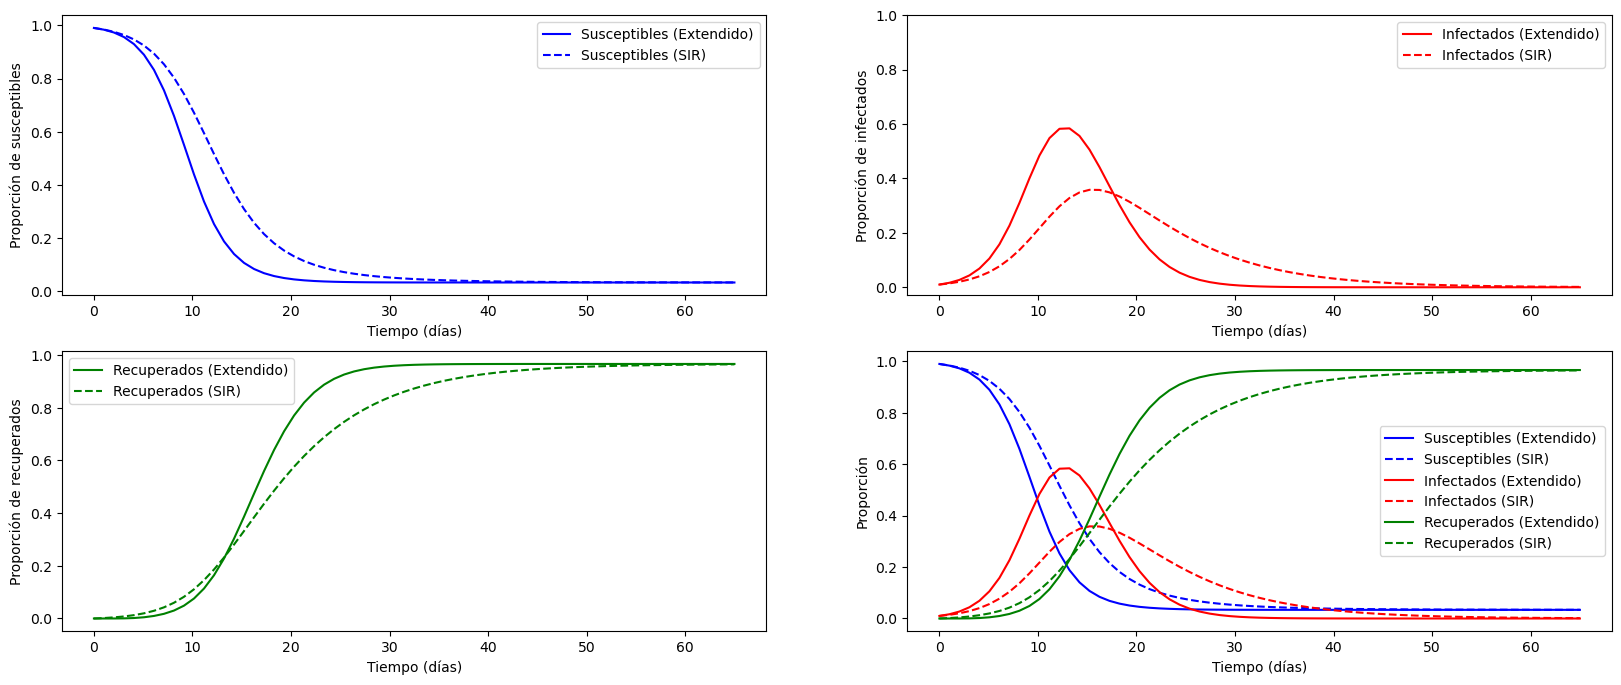

In [ ]:
def extended_model(y, t, beta, T):
    s = y[0]                       # Susceptibles
    x = y[1:T+1]                   # Infectados en día d
    r = y[T+1]                     # Recuperados

    # Calculamos el total de infectados
    total_infectados = np.sum(x)

    # Ecuación para susceptibles
    dsdt = -beta * s * total_infectados

    # Ecuaciones para infectados
    dxdt = np.zeros(T)
    dxdt[0] = beta * s * total_infectados - x[0]
    for i in range(1, T):
        dxdt[i] = x[i-1] - x[i]

    # Ecuación para recuperados
    drdt = x[T-1]

    # Devolvemos las derivadas
    dydt = np.concatenate(([dsdt], dxdt, [drdt]))
    return dydt

def sir_model(y, t, beta, gamma):
    s, x, r = y
    dsdt = -beta * s * x
    dxdt = beta * s * x - gamma * x
    drdt = gamma * x
    return [dsdt, dxdt, drdt]

y0_extended = np.concatenate(([s0], [x0], np.zeros(T-1), [r0]))

# Resolución numérica del modelo extendido
sol_extended = odeint(extended_model, y0_extended, t, args=(beta, T))

# Resolución numérica del modelo SIR original
y0_sir = [s0, x0, r0]
sol_sir = odeint(sir_model, y0_sir, t, args=(beta, gamma))

# Modelo extendido
s_extended = sol_extended[:, 0]
x_extended = np.sum(sol_extended[:, 1:T+1], axis=1)
r_extended = sol_extended[:, T+1]

# Modelo SIR original
s_sir = sol_sir[:, 0]
x_sir = sol_sir[:, 1]
r_sir = sol_sir[:, 2]

# Gráfica comparativa
plt.figure(figsize=(20, 8))

plt.subplot(2, 2, 1)
plt.plot(t, s_extended, 'b', label='Susceptibles (Extendido)')
plt.plot(t, s_sir, 'b--', label='Susceptibles (SIR)')
plt.legend()
plt.xlabel('Tiempo (días)')
plt.ylabel('Proporción de susceptibles')

plt.subplot(2, 2, 2)
plt.plot(t, x_extended, 'r', label='Infectados (Extendido)')
plt.plot(t, x_sir, 'r--', label='Infectados (SIR)')
plt.legend()
plt.xlabel('Tiempo (días)')
plt.ylabel('Proporción de infectados')
plt.yticks(np.arange(0, 1.2, 0.2))

plt.subplot(2, 2, 3)
plt.plot(t, r_extended, 'g', label='Recuperados (Extendido)')
plt.plot(t, r_sir, 'g--', label='Recuperados (SIR)')
plt.legend()
plt.xlabel('Tiempo (días)')
plt.ylabel('Proporción de recuperados')

plt.subplot(2, 2, 4)
plt.plot(t, s_extended, 'b', label='Susceptibles (Extendido)')
plt.plot(t, s_sir, 'b--', label='Susceptibles (SIR)')
plt.plot(t, x_extended, 'r', label='Infectados (Extendido)')
plt.plot(t, x_sir, 'r--', label='Infectados (SIR)')
plt.plot(t, r_extended, 'g', label='Recuperados (Extendido)')
plt.plot(t, r_sir, 'g--', label='Recuperados (SIR)')
plt.legend()
plt.xlabel('Tiempo (días)')
plt.ylabel('Proporción')
plt.show()

(c) Representar gráficamente las diferencias entre las salidas de un modelo y otro (e.g, número total de infectados) en función de la duración de la enfermedad y otros parámetros.

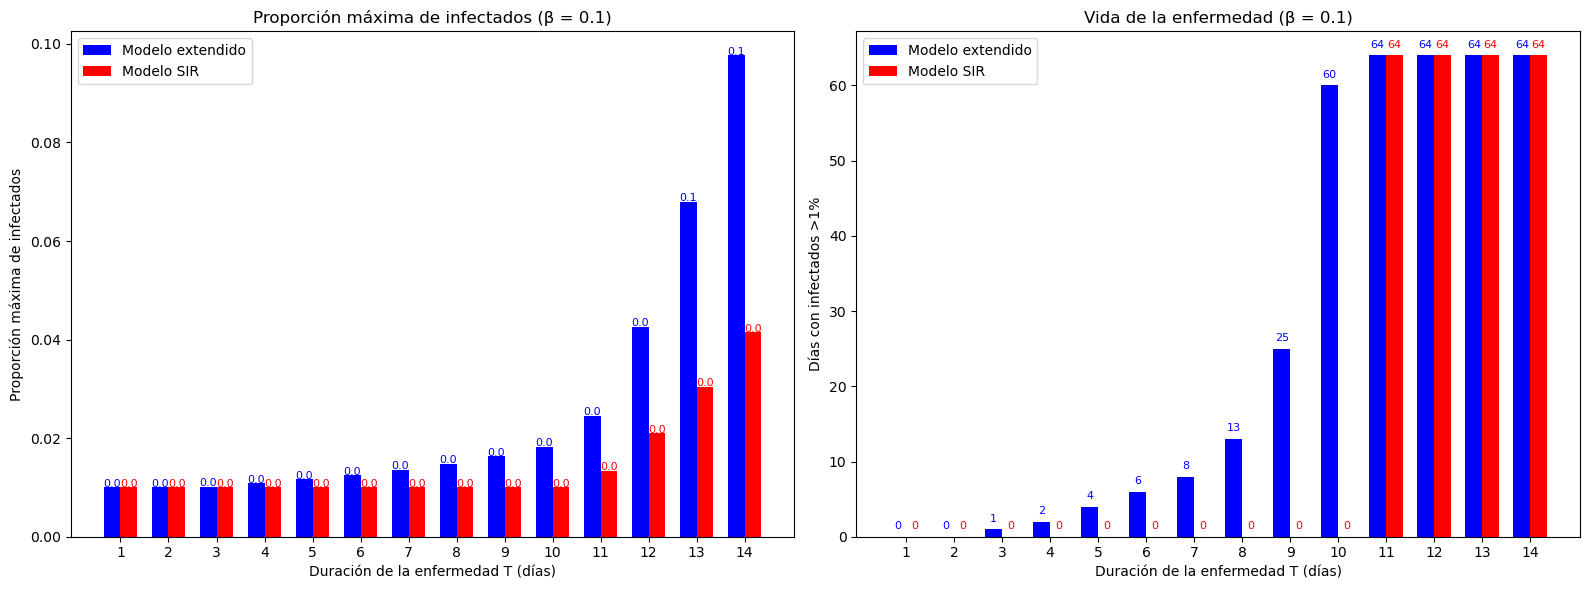

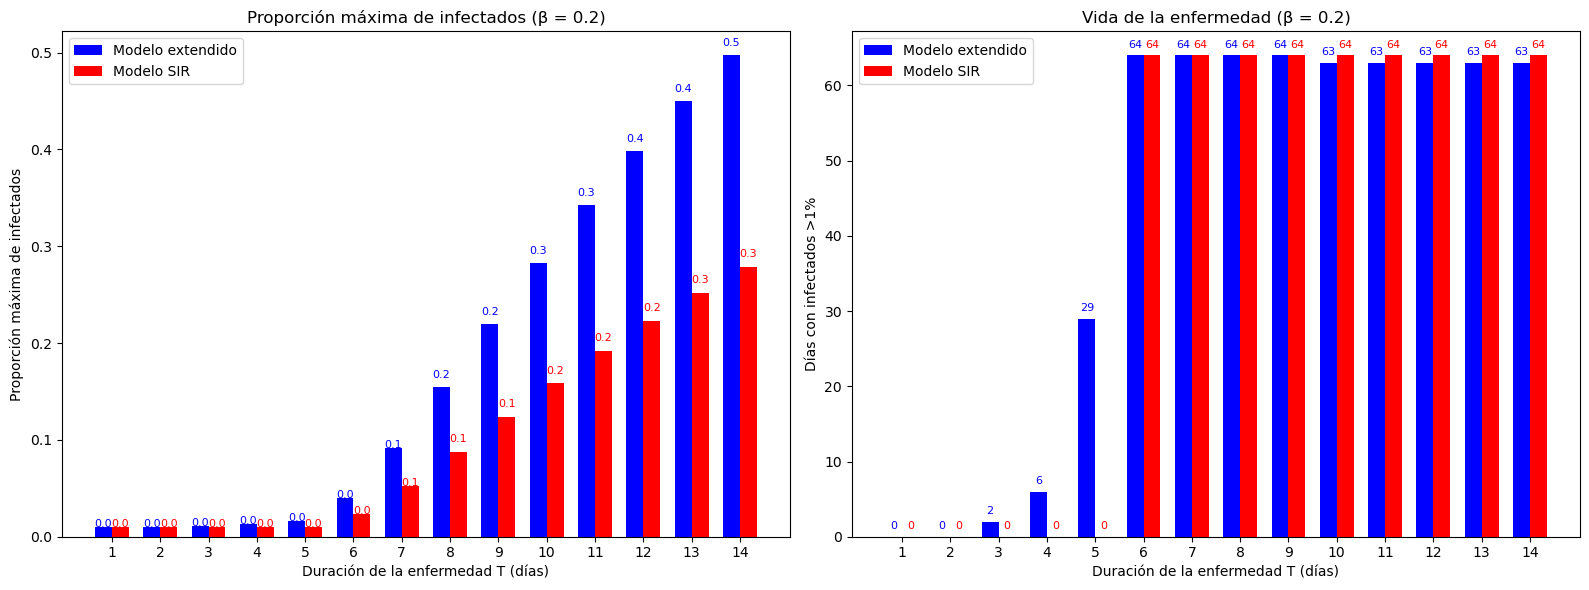

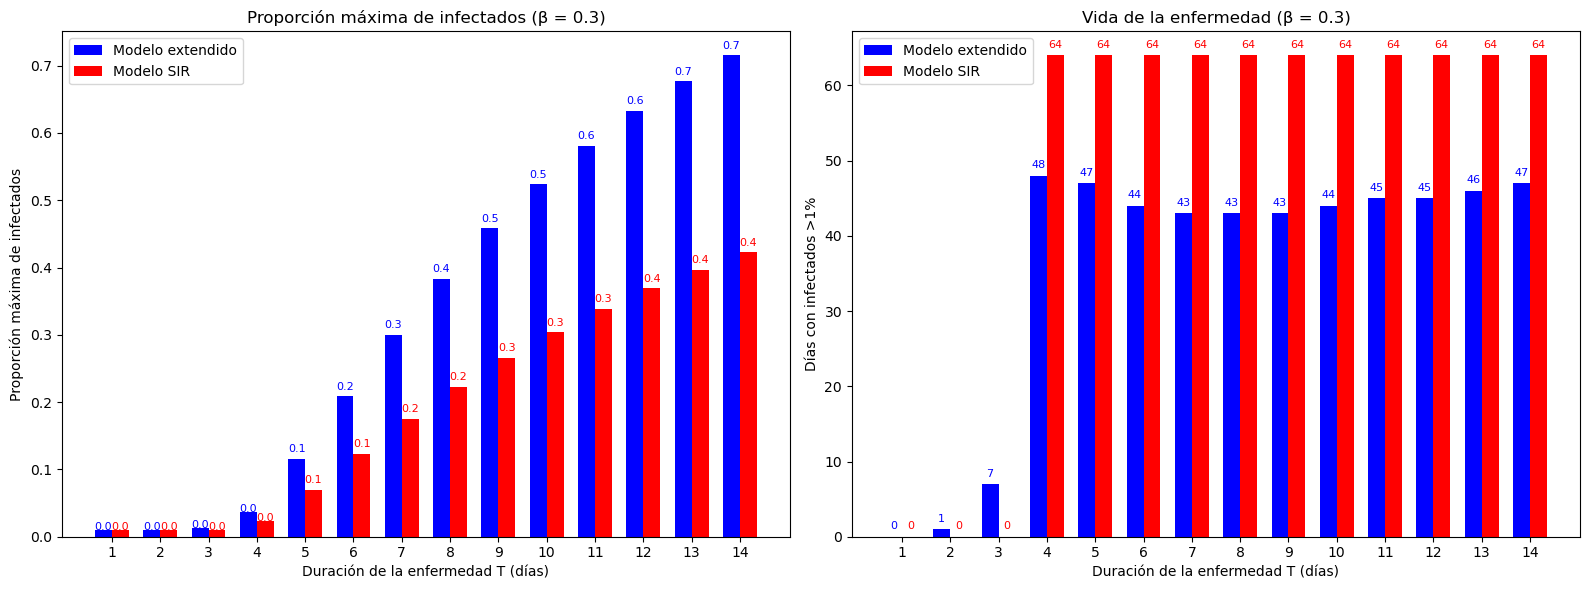

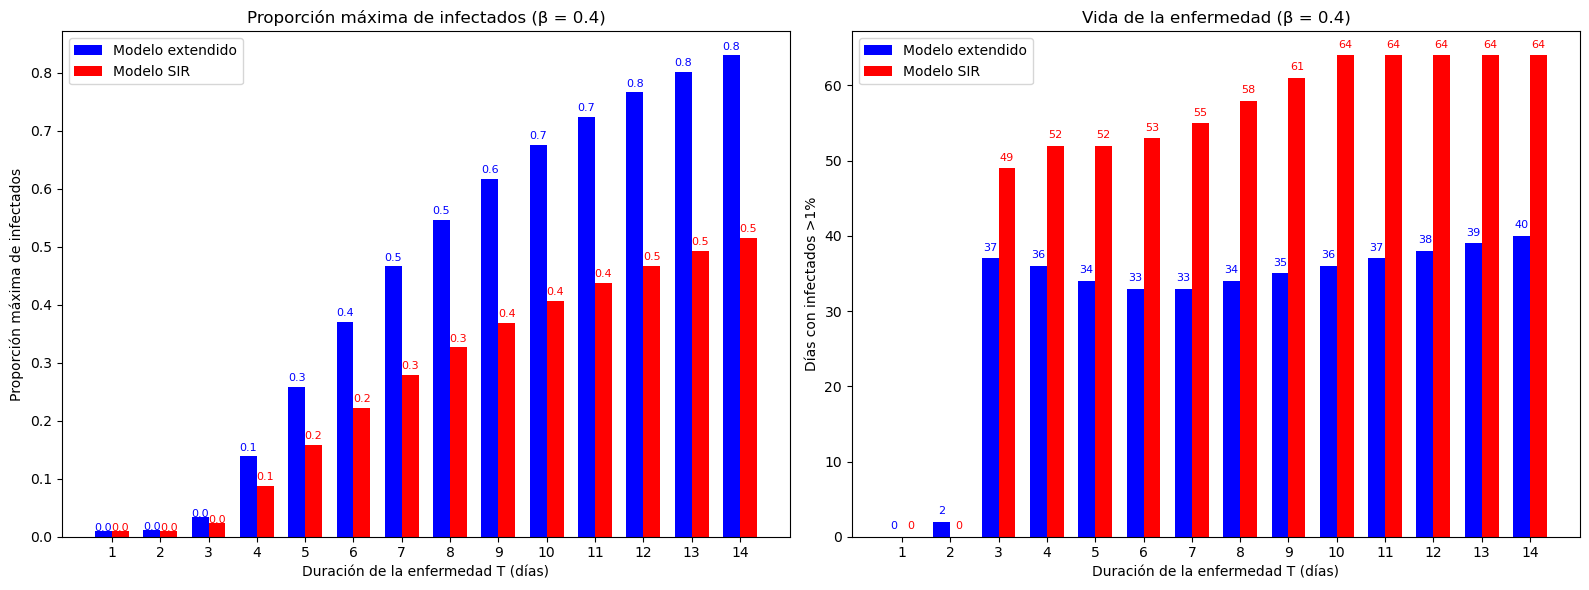

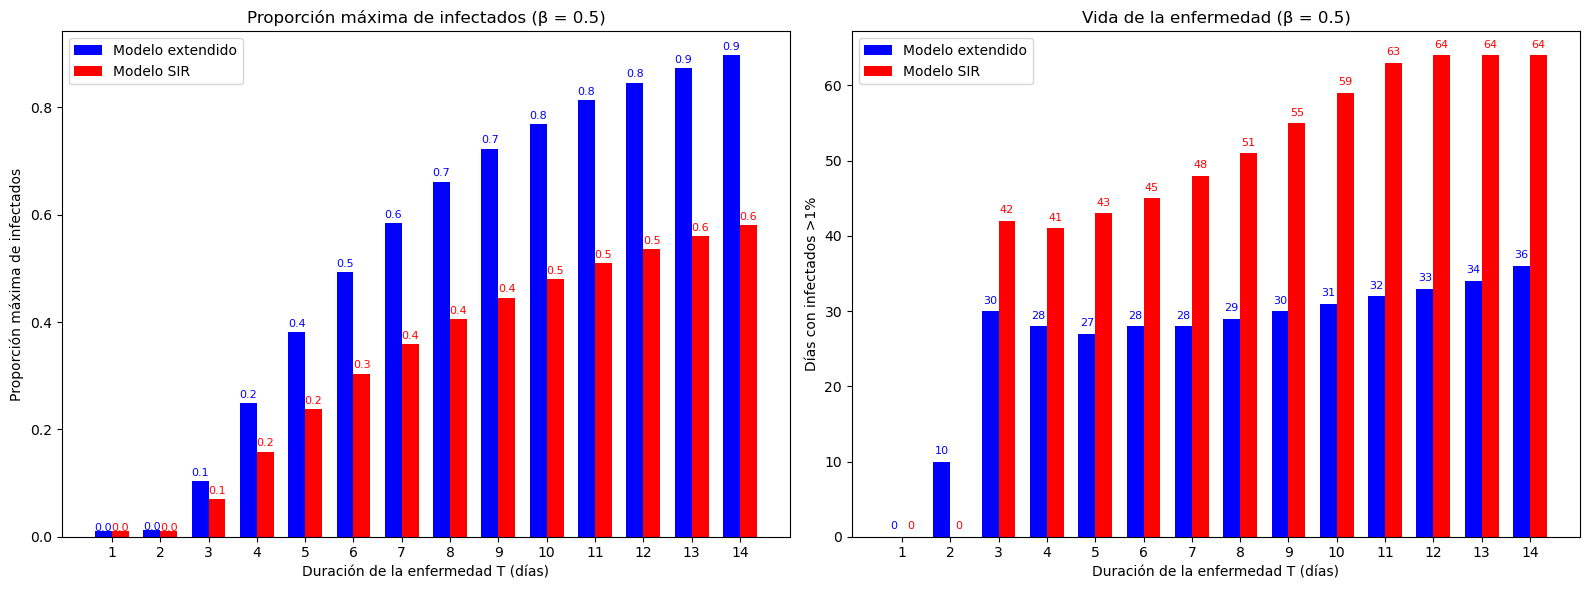

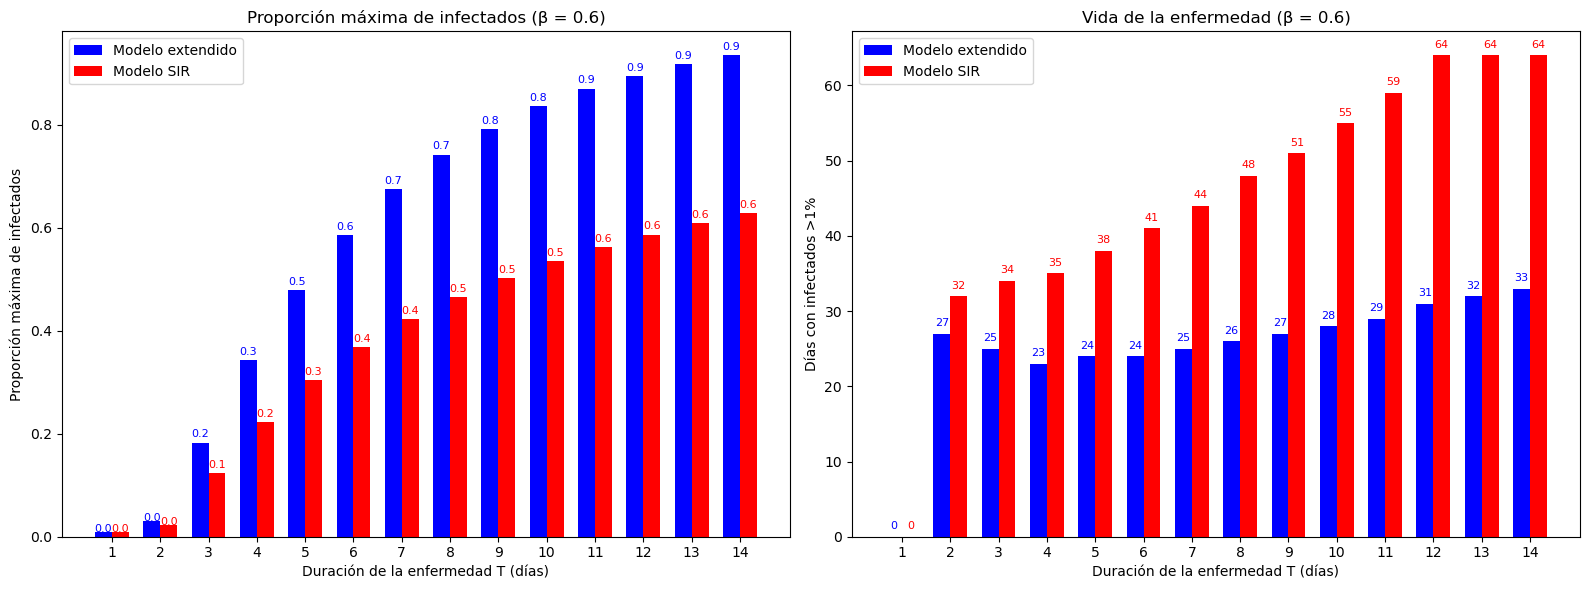

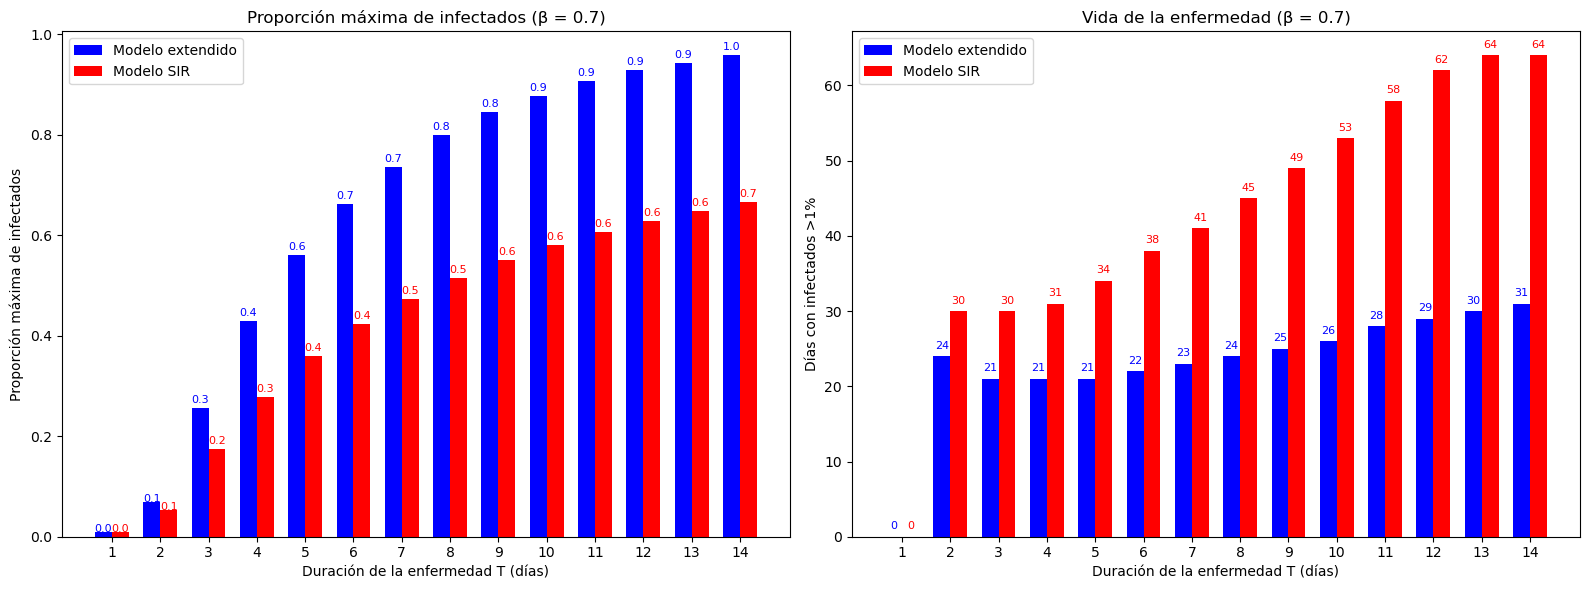

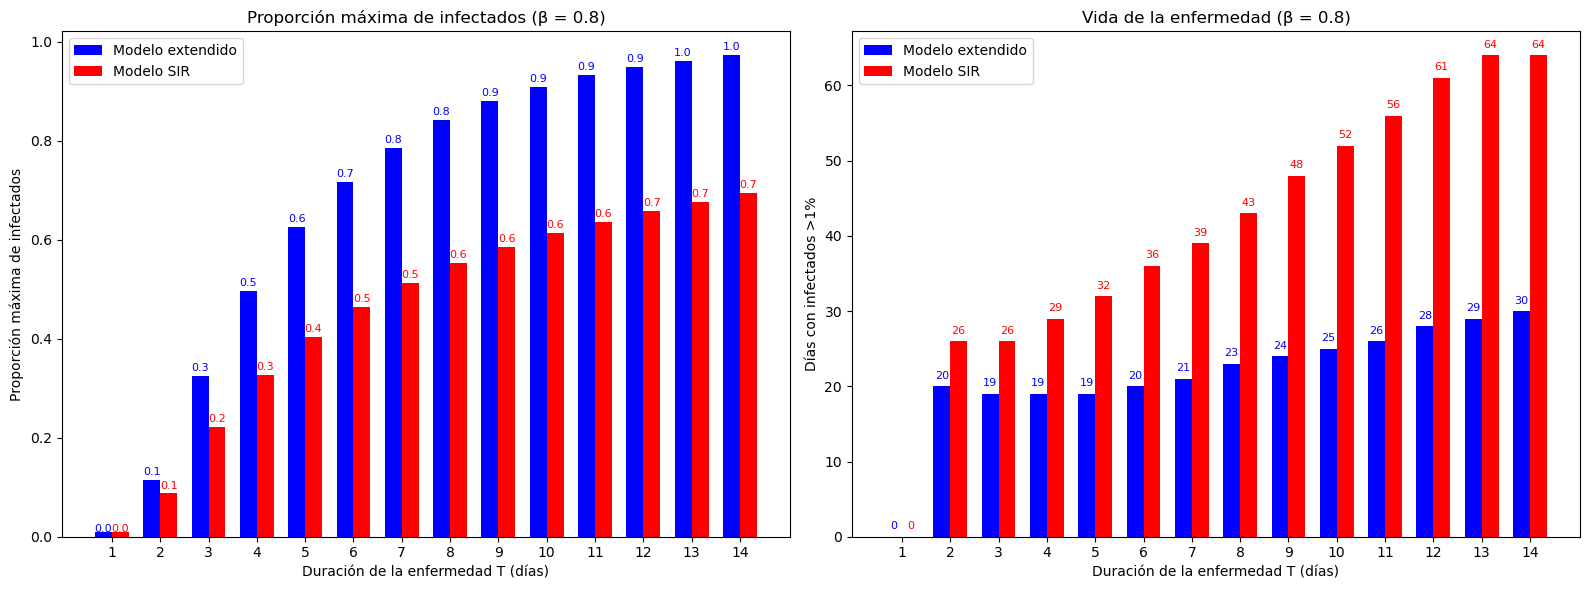

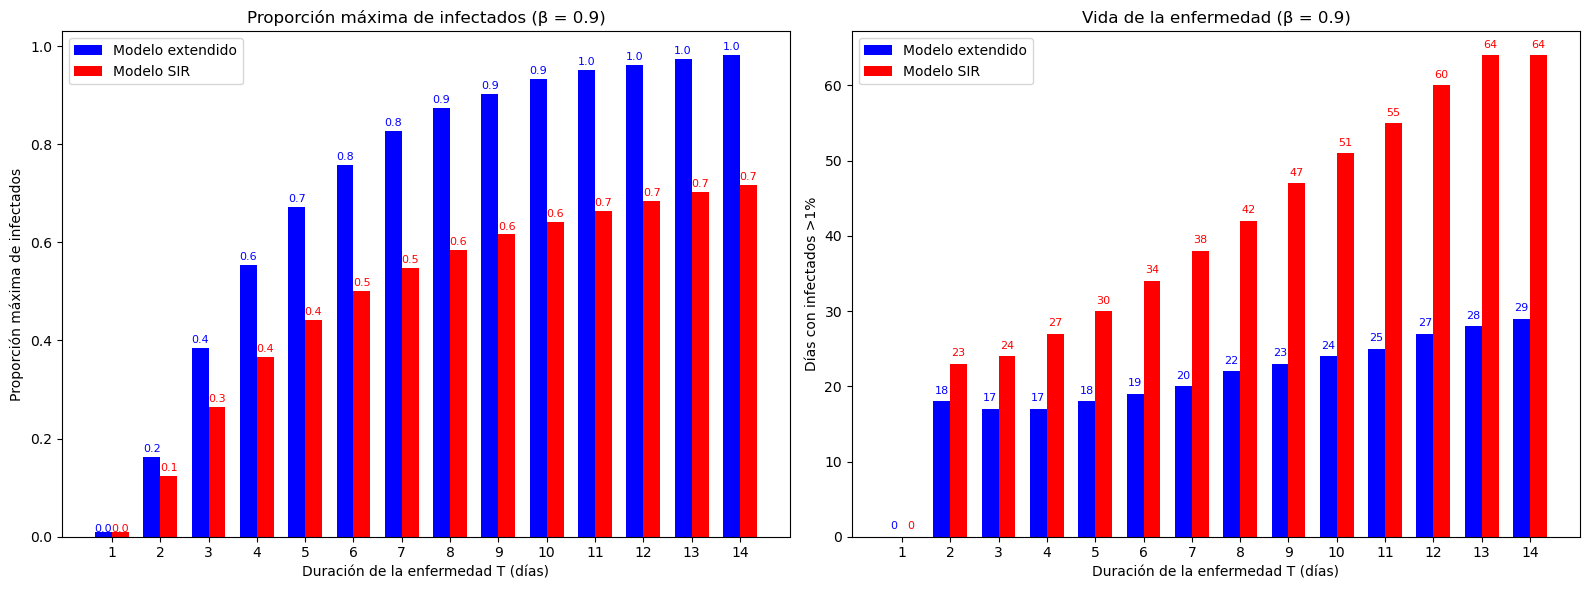

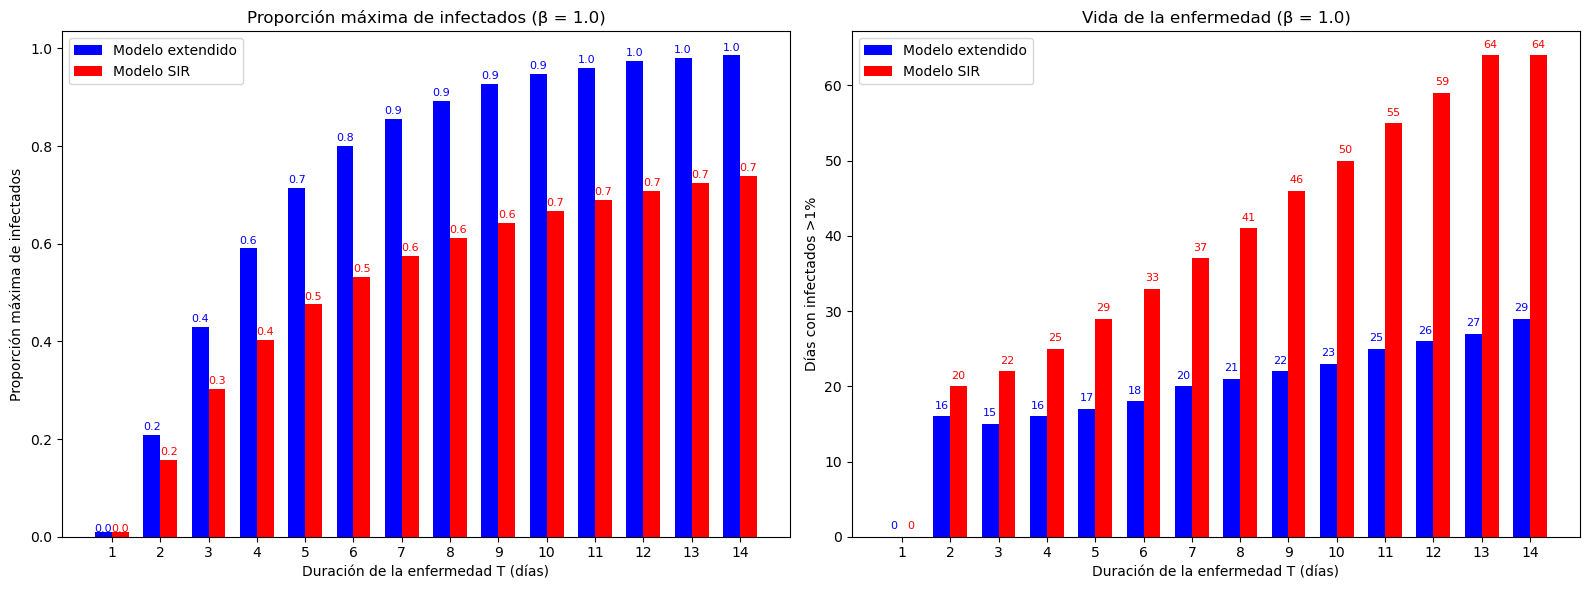

In [ ]:
T_values = list(range(1, 15))
beta_values = np.arange(0.1, 1.1, 0.1)

for beta in beta_values:
    max_infectados_extended = []
    max_infectados_sir = []
    life_disease_extended = []
    life_disease_sir = []
    
    for T in T_values:
        gamma = 1 / T
        # Modelo extendido
        y0_extended = np.concatenate(([s0], [x0], np.zeros(T-1), [r0]))
        sol_extended = odeint(extended_model, y0_extended, t, args=(beta, T))
        x_extended = np.sum(sol_extended[:, 1:T+1], axis=1)
        max_infectados_extended.append(max(x_extended))
        life_disease_extended.append(np.sum(x_extended > 0.01))  # Tiempo por encima del 1%
    
        # Modelo SIR
        y0_sir = [s0, x0, r0]
        sol_sir = odeint(sir_model, y0_sir, t, args=(beta, gamma))
        x_sir = sol_sir[:, 1]
        max_infectados_sir.append(max(x_sir))
        life_disease_sir.append(np.sum(x_sir > 0.01))  # Tiempo por encima del 1%
    
    # Gráfica de los valores máximos de infectados y vida de la enfermedad
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    width = 0.35  # Ancho de las barras
    
    # Subplot 1: Proporción máxima de infectados
    indices = np.arange(len(T_values))
    ax1.bar(indices - width/2, max_infectados_extended, width=width, label='Modelo extendido', color='blue')
    ax1.bar(indices + width/2, max_infectados_sir, width=width, label='Modelo SIR', color='red')
    ax1.set_xlabel('Duración de la enfermedad T (días)')
    ax1.set_ylabel('Proporción máxima de infectados')
    ax1.set_title(f'Proporción máxima de infectados (β = {beta:.1f})')
    ax1.set_xticks(indices)
    ax1.set_xticklabels(T_values)
    ax1.legend()
    
    # Mostrar los valores máximos en cada barra
    for i in indices:
        if max_infectados_extended[i] < 0.1:
            ax1.text(i - width/2, max_infectados_extended[i] + 0.0001, f"{max_infectados_extended[i]:.1f}", ha='center', color='blue', fontsize=8)
            ax1.text(i + width/2, max_infectados_sir[i] + 0.0001, f"{max_infectados_sir[i]:.1f}", ha='center', color='red', fontsize=8)
        else:
            ax1.text(i - width/2, max_infectados_extended[i] + 0.01, f"{max_infectados_extended[i]:.1f}", ha='center', color='blue', fontsize=8)
            ax1.text(i + width/2, max_infectados_sir[i] + 0.01, f"{max_infectados_sir[i]:.1f}", ha='center', color='red', fontsize=8)
    
    # Subplot 2: Vida de la enfermedad (tiempo > 1%)
    ax2.bar(indices - width/2, life_disease_extended, width=width, label='Modelo extendido', color='blue')
    ax2.bar(indices + width/2, life_disease_sir, width=width, label='Modelo SIR', color='red')
    ax2.set_xlabel('Duración de la enfermedad T (días)')
    ax2.set_ylabel('Días con infectados >1%')
    ax2.set_title(f'Vida de la enfermedad (β = {beta:.1f})')
    ax2.set_xticks(indices)
    ax2.set_xticklabels(T_values)
    ax2.legend()
    
    # Mostrar los tiempos de vida en cada barra
    for i in indices:
        ax2.text(i - width/2, life_disease_extended[i] + 1, f"{life_disease_extended[i]}", ha='center', color='blue', fontsize=8)
        ax2.text(i + width/2, life_disease_sir[i] + 1, f"{life_disease_sir[i]}", ha='center', color='red', fontsize=8)
    
    plt.tight_layout()
    plt.show()

**Apartado 2.** Incluir un proceso de inmunización a partir del modelo SIR presentado en el enunciado. Dada una población $N$ de individuos, asumir que se vacuna un número fijo $p$ de personas cada día.

(a) Escribir las ecuaciones del modelo (es necesario para ello re-escribir el modelo SIR para poblaciones $S$, $X$, $R$, donde $S+X+R=N$)

# Modelos de Inmunización en SIR

Aquí se presentan las ecuaciones de los modelos SIR implementados en el código para simular la inmunización mediante vacunación.

## 1. Modelo SIR con Tasa de Inmunización (Immunization Rate)

Este modelo considera una tasa de inmunización $\delta$ que reduce continuamente la cantidad de susceptibles al vacunarlos. Las ecuaciones diferenciales son las siguientes:

$$
\frac{{dS}}{{dt}} = -\beta \frac{{S I}}{{N}} - \delta S
$$
$$
\frac{{dI}}{{dt}} = \beta \frac{{S I}}{{N}} - \gamma I
$$
$$
\frac{{dR}}{{dt}} = \gamma I + \delta S
$$

**Donde:**
- $S$: Número de individuos susceptibles.
- $I$: Número de individuos infectados.
- $R$: Número de individuos recuperados o inmunizados.
- $N$: Población total.
- $\beta$: Tasa de transmisión.
- $\gamma$: Tasa de recuperación.
- $\delta$: Tasa de inmunización de susceptibles.

## 2. Modelo SIR con Vacunación Constante (Constant Vaccination)

Este modelo implementa una vacunación constante de $p$ individuos susceptibles por día. Las ecuaciones diferenciales para este caso son:

### Cuando $S > p$:

$$
\frac{{dS}}{{dt}} = -\beta \frac{{S I}}{{N}} - p
$$
$$
\frac{{dI}}{{dt}} = \beta \frac{{S I}}{{N}} - \gamma I
$$
$$
\frac{{dR}}{{dt}} = \gamma I + p
$$

### Cuando $S \leq p$: 

En este caso, vacunamos a todos los susceptibles restantes (todos se trasladan a la categoría de recuperados).

$$
\frac{{dS}}{{dt}} = -\beta \frac{{S I}}{{N}} - S
$$
$$
\frac{{dI}}{{dt}} = \beta \frac{{S I}}{{N}} - \gamma I
$$
$$
\frac{{dR}}{{dt}} = \gamma I + S
$$

**Donde:**
- $p$: Número de individuos vacunados cada día (constante).

Ambos modelos adaptan el clásico modelo SIR para simular la inmunización a través de vacunación, ya sea mediante una tasa de inmunización continua o una vacunación constante en el tiempo.

(b) Comparar la evolución del número total de susceptibles, infectados y recuperados de este modelo extendido con el modelo SIR original con inmunización, donde se vacunan un porcentaje determinado de la poblacion

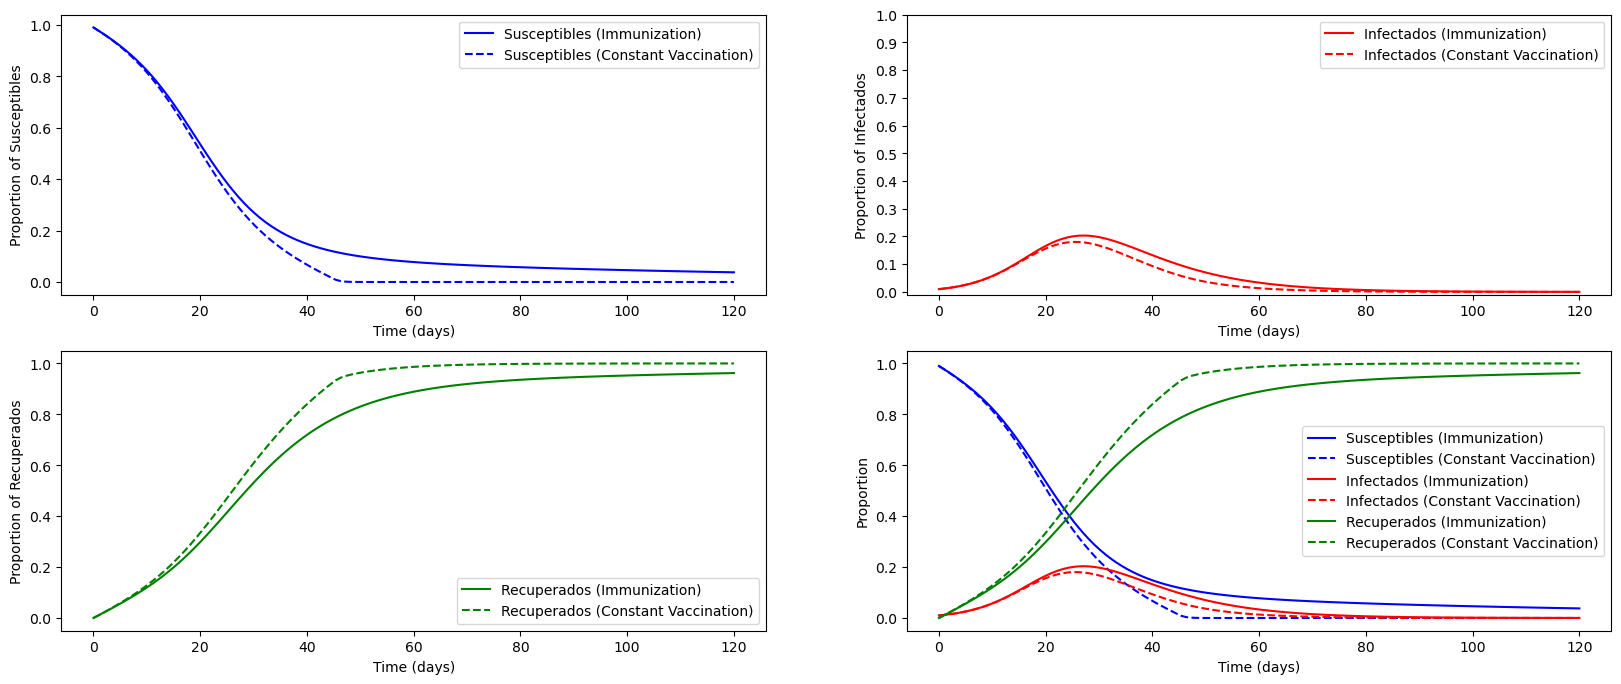

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

N = 1000
T = 10
beta = 0.3
gamma = 1/T
delta = 0.01
p = 10
simulation_duration = 120
t = np.linspace(0, simulation_duration, simulation_duration)

S0 = 0.99 * N
I0 = 0.01 * N
R0 = 0 * N

y0_immunization = [S0, I0, R0]
y0_constant = [S0, I0, R0]

def sir_model_with_immunization(y, t, beta, gamma, delta, N):
    S, I, R = y
    dSdt = -beta * S * I / N - delta * S
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I + delta * S
    return [dSdt, dIdt, dRdt]

def sir_model_const_vaccination(y, t, beta, gamma, N, p):
    S, I, R = y
    if S > p:
        dSdt = -beta * S * I / N - p
        dRdt = gamma * I + p
    else:
        dSdt = -beta * S * I / N - S
        dRdt = gamma * I + S
    dIdt = beta * S * I / N - gamma * I
    return [dSdt, dIdt, dRdt]

sol_immunization = odeint(sir_model_with_immunization, y0_immunization, t, args=(beta, gamma, delta, N))
S_immunization, I_immunization, R_immunization = sol_immunization.T

sol_constant = odeint(sir_model_const_vaccination, y0_constant, t, args=(beta, gamma, N, p))
S_constant, I_constant, R_constant = sol_constant.T

plt.figure(figsize=(20, 8))

plt.subplot(2, 2, 1)
plt.plot(t, S_immunization / N, 'b', label='Susceptibles (Immunization)')
plt.plot(t, S_constant / N, 'b--', label='Susceptibles (Constant Vaccination)')
plt.legend()
plt.xlabel('Time (days)')
plt.ylabel('Proportion of Susceptibles')

plt.subplot(2, 2, 2)
plt.plot(t, I_immunization / N, 'r', label='Infectados (Immunization)')
plt.plot(t, I_constant / N, 'r--', label='Infectados (Constant Vaccination)')
plt.legend()
plt.xlabel('Time (days)')
plt.ylabel('Proportion of Infectados')
plt.yticks(np.arange(0, 1.1, 0.1))

plt.subplot(2, 2, 3)
plt.plot(t, R_immunization / N, 'g', label='Recuperados (Immunization)')
plt.plot(t, R_constant / N, 'g--', label='Recuperados (Constant Vaccination)')
plt.legend()
plt.xlabel('Time (days)')
plt.ylabel('Proportion of Recuperados')

plt.subplot(2, 2, 4)
plt.plot(t, S_immunization / N, 'b', label='Susceptibles (Immunization)')
plt.plot(t, S_constant / N, 'b--', label='Susceptibles (Constant Vaccination)')
plt.plot(t, I_immunization / N, 'r', label='Infectados (Immunization)')
plt.plot(t, I_constant / N, 'r--', label='Infectados (Constant Vaccination)')
plt.plot(t, R_immunization / N, 'g', label='Recuperados (Immunization)')
plt.plot(t, R_constant / N, 'g--', label='Recuperados (Constant Vaccination)')
plt.legend()
plt.xlabel('Time (days)')
plt.ylabel('Proportion')
plt.show()


(c) Encontrar el número mínimo de vacunados $p^*$ para los que se alcanza la inmunidad de rebaño, o sea, la enfermedad no llega a desarrollarse o lo hace muy levemente

In [3]:
import numpy as np

def simulate_const_vaccination(y0_constant, t, beta, gamma, N, p):
    sol = odeint(sir_model_const_vaccination, y0_constant, t, args=(beta, gamma, N, p))
    S, I, R = sol.T
    return S, I, R

N = 1000
T = 10
beta = 0.5
gamma = 1 / T
p = 10
simulation_duration = 120
t = np.linspace(0, simulation_duration, simulation_duration)

S0 = 0.99 * N
I0 = 0.01 * N
R0 = 0 * N

y0_constant = [S0, I0, R0]

p_values = np.arange(1, N, 1)
p_star_value = None

for p in p_values:
    threshold = N * 0.03    
    S, I, R = simulate_const_vaccination(y0_constant, t, beta, gamma, N, p)
    if max(I) < threshold:
        p_star_value = p
        break

print(f"El valor de p* es {p_star_value}")

El valor de p* es 136


(d) Estudiar ese nivel mínimo de vacunados en función del tamaño de la población $N$ (representar $p^*/N$ en función de $N$). 

In [ ]:
import numpy as np

def simulate_const_vaccination(y0_constant, t, beta, gamma, N, p):
    sol = odeint(sir_model_const_vaccination, y0_constant, t, args=(beta, gamma, N, p))
    S, I, R = sol.T
    return S, I, R

N_list = np.linspace(100, 1000, 20, dtype=int)
p_star_values = []
p_star_N_values = []
for N in N_list:
    T = 10
    beta = 0.5
    gamma = 1 / T
    p = 10
    simulation_duration = 120
    t = np.linspace(0, simulation_duration, simulation_duration)

    S0 = 0.99 * N
    I0 = 0.01 * N
    R0 = 0 * N

    y0_constant = [S0, I0, R0]

    p_values = np.arange(1, N, 1)
    p_star_value = None

    for p in p_values:
        threshold = N * 0.03    
        S, I, R = simulate_const_vaccination(y0_constant, t, beta, gamma, N, p)
        if max(I) < threshold:
            p_star_values.append(p)
            p_star_N_values.append(p/N)
            break


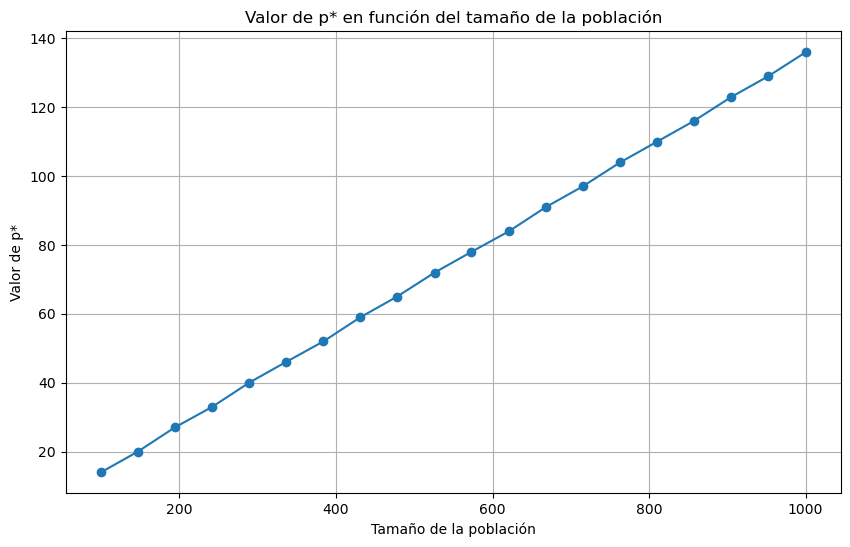

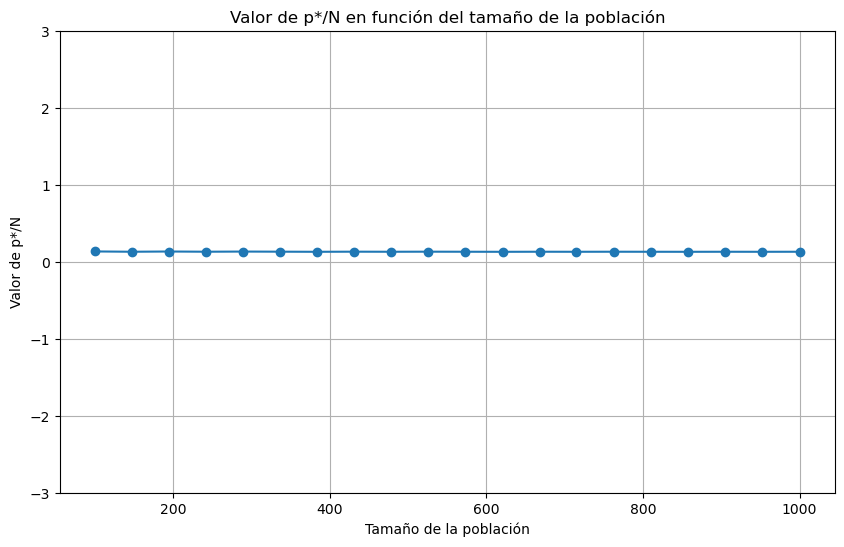

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(N_list, p_star_values, 'o-')
plt.xlabel('Tamaño de la población')
plt.ylabel('Valor de p*')
plt.title('Valor de p* en función del tamaño de la población')
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(N_list, p_star_N_values, 'o-')
plt.xlabel('Tamaño de la población')
plt.ylabel('Valor de p*/N')
plt.title('Valor de p*/N en función del tamaño de la población')
plt.ylim(-3, 3)
plt.grid()
plt.show()

## Ejercicio 2

Trabajaremos en este ejercicio con extensiones del modelo de Leslie. Supongamos que tenemos una población de peces salvajes dividida en tres grupos de edad de un año cada una y cuya matriz de Leslie es la siguiente: 
$$L=\left[ \begin{array}{lll} 0 & 2 & 3 \\ 1/3 &  0 &  0\\ 0 & 1/2 & 0 \end{array}\right].$$
Parte de la población se cosecha anualmente con fines comerciales. Supóngase que se puede seleccionar el grupo de edad que se extrae a través de la tecnología pesquera. Se nota $d_i$ la tasa de extracción anual de la población de hembras en cada año para el grupo de edad $i$, $i=1,2,3$. 

**Apartado 1**.

(a) Escribir la ecuación en diferencias que determinaría la evolución de los individuos con esas tasas de extracción individualizadas por grupos de edad. Utilizar para ello notación matricial

Para modelar la evolución de la población con tasas de extracción individualizada por grupo de edad, debemos ajustar la matriz de Leslie teniendo en cuenta la fracción de individuos a remover por grupo de edad. La ecuación diferencial del ajuste en notación matricial es:


$$ n_{t+1} = (I-D)Ln_t $$

donde:
- $n_t$ es la población en el instante t 
- $I$ es la matriz identidad.
- $D$ = diag($d_1,d_2,d_3$) es la matriz diagonal de las tasas de extracción.
- $L$ es la matriz de Leslie

(b) Estudiar la proporción de la población a largo plazo si no existiera cosecha alguna e indicar qué tipo de crecimiento describe (expansivo, estable o en extinción)

Autovalor dominante (λ): 1.0657487489560626
Tipo de crecimiento: Expansivo
Proporción a largo plazo en cada grupo de edad:
Grupo 1: 68.52%
Grupo 2: 21.43%
Grupo 3: 10.05%


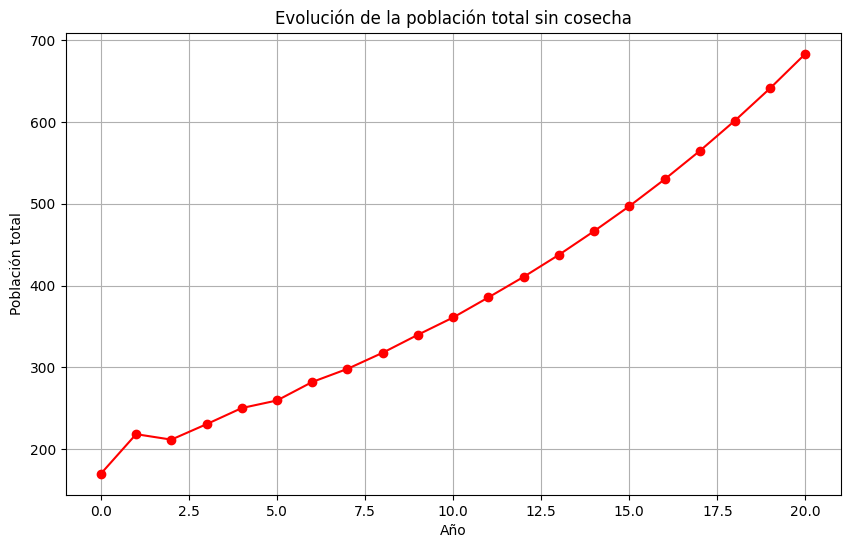

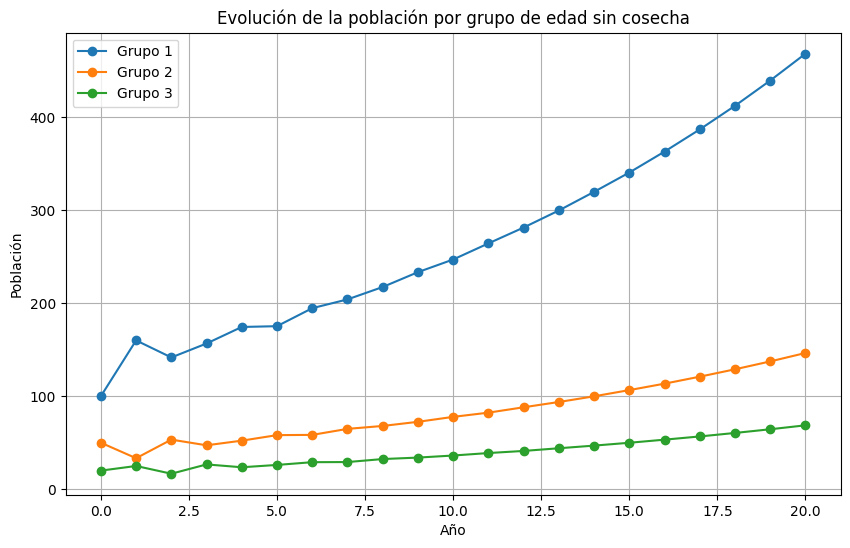

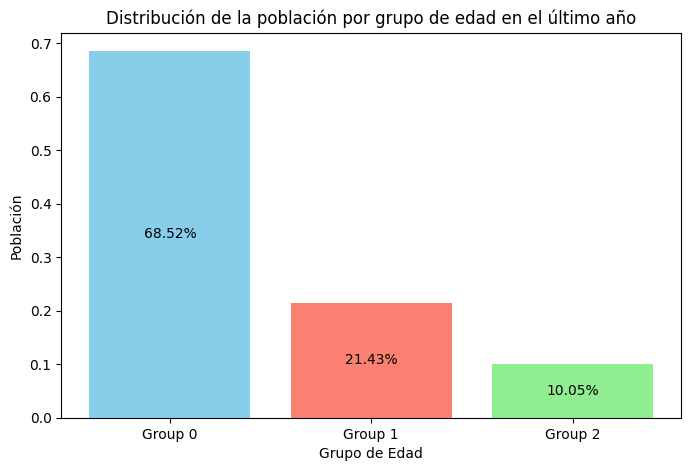

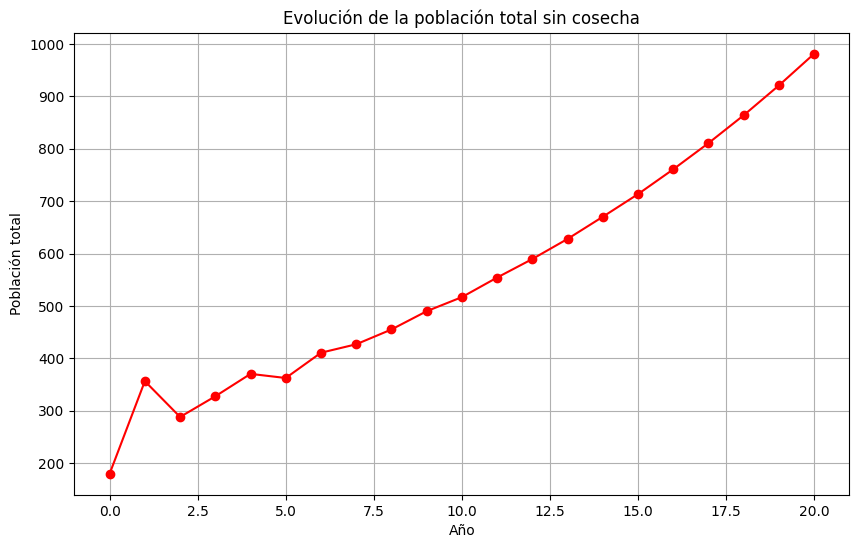

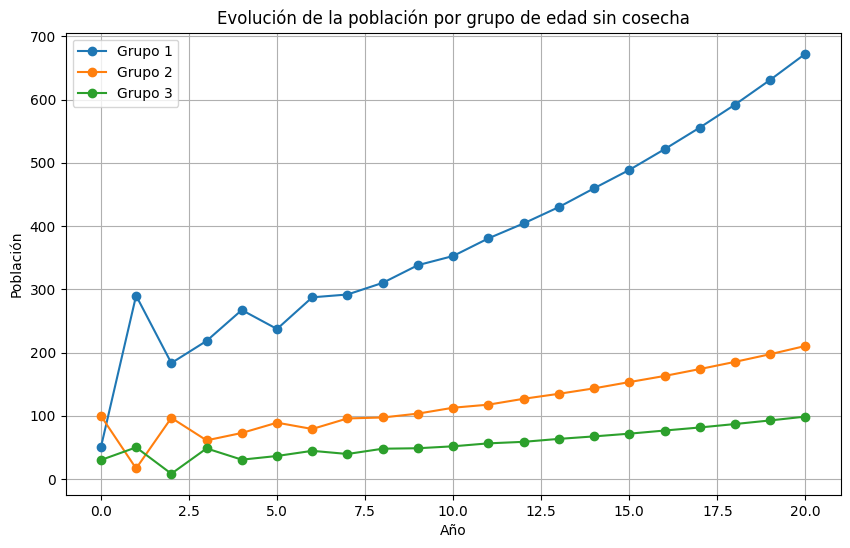

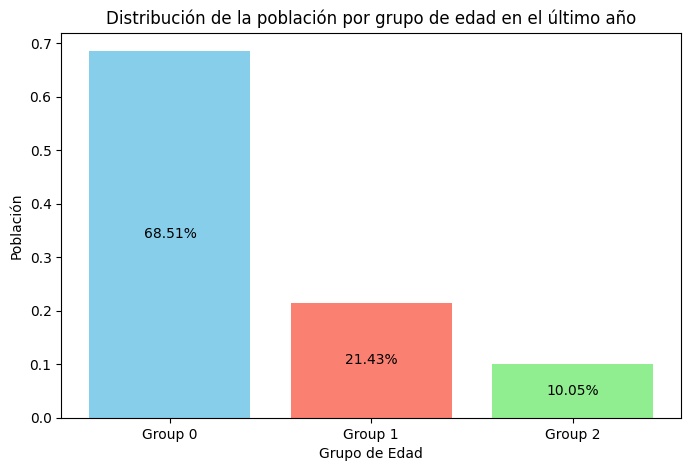

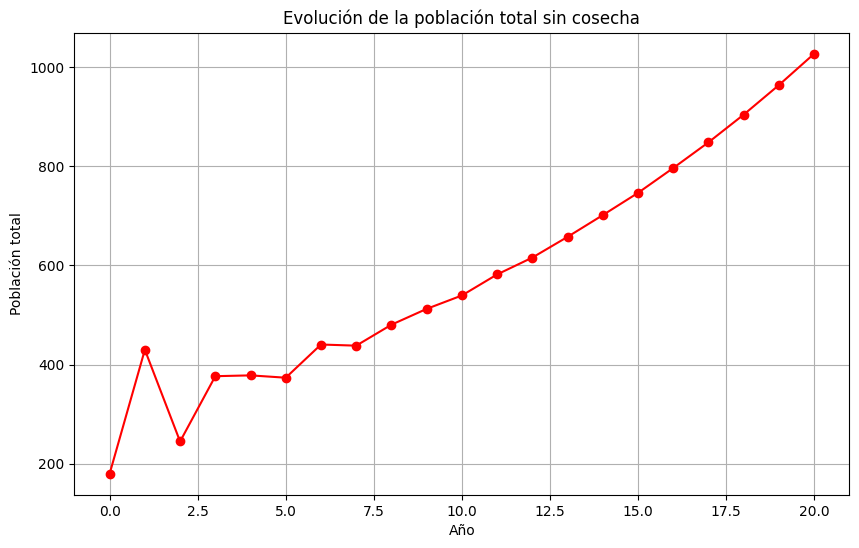

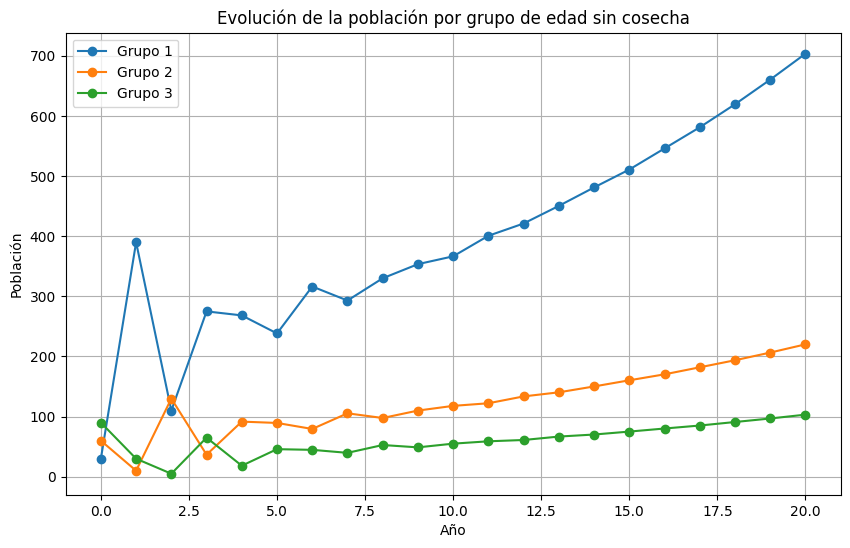

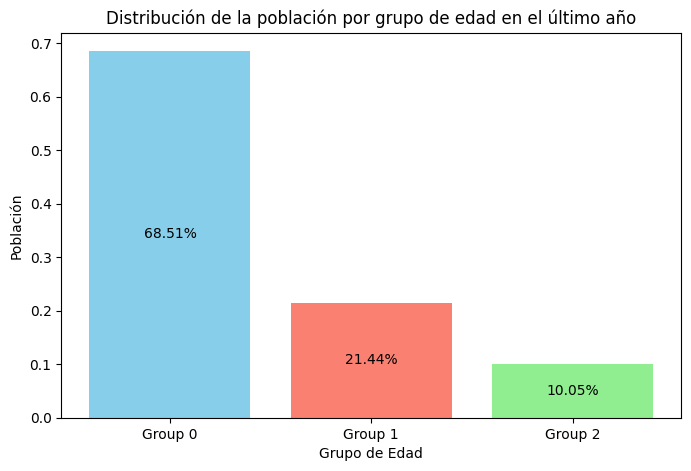

In [ ]:
import numpy as np
from scipy.linalg import eig
import matplotlib.pyplot as plt

# Definir la matriz de Leslie L
L = np.array([[0,     2,     3],
              [1/3,   0,     0],
              [0,     1/2,   0]])

# Calcular los autovalores y autovectores
vals, vecs = eig(L)

# Obtener el autovalor dominante (el de mayor valor absoluto)
idx = np.argmax(np.abs(vals))
lambda_dominante = np.real(vals[idx])
autovector_dominante = np.real(vecs[:, idx])

# Normalizar el autovector para obtener proporciones
proporciones = autovector_dominante / np.sum(autovector_dominante)

# Mostrar resultados
print("Autovalor dominante (λ):", lambda_dominante)
print("Tipo de crecimiento:", end=" ")
if lambda_dominante > 1:
    print("Expansivo")
elif lambda_dominante == 1:
    print("Estable")
else:
    print("En extinción")

print("Proporción a largo plazo en cada grupo de edad:")
for i, p in enumerate(proporciones, 1):
    print(f"Grupo {i}: {p*100:.2f}%")

# Vector de población inicial (puedes ajustarlo según tus necesidades)
n0_list = [
    np.array([100, 50, 20]),    # Población inicial 1
    np.array([50, 100, 30]),    # Población inicial 2
    np.array([30, 60, 90])      # Población inicial 3
]

# Número de años a simular
años = 20
grupos = ['Group 0', 'Group 1', 'Group 2']

for n0 in n0_list:
    # Almacenar la población en cada año
    poblacion = np.zeros((años + 1, 3))
    poblacion[0, :] = n0

    # Simulación a lo largo del tiempo
    for t in range(años):
        poblacion[t + 1, :] = L @ poblacion[t, :]

    # Calcular la población total en cada año
    poblacion_total = np.sum(poblacion, axis=1)

    # Graficar la población total a lo largo del tiempo
    plt.figure(figsize=(10, 6))
    plt.plot(range(años + 1), poblacion_total, marker='o', color='red')
    plt.title('Evolución de la población total sin cosecha')
    plt.xlabel('Año')
    plt.ylabel('Población total')
    plt.grid(True)
    plt.show()

    # Graficar la población por grupo de edad
    plt.figure(figsize=(10, 6))
    for i in range(3):
        plt.plot(range(años + 1), poblacion[:, i], marker='o', label=f'Grupo {i+1}')
    plt.title('Evolución de la población por grupo de edad sin cosecha')
    plt.xlabel('Año')
    plt.ylabel('Población')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Graficar la población por grupo de edad con barras apiladas
    # Graficar la distribución de población por grupo de edad en el último año
    plt.figure(figsize=(8, 5))
    plt.bar(grupos, poblacion[-1, :]/poblacion_total[-1],color=['skyblue', 'salmon', 'lightgreen'])
    for i, p in enumerate(poblacion[-1, :]/poblacion_total[-1]):
        plt.text(i, p/2, f"{p*100:.2f}%", ha='center', va='center', color='black')
    plt.title('Distribución de la población por grupo de edad en el último año')
    plt.xlabel('Grupo de Edad')
    plt.ylabel('Población')
    plt.show()

(c) Estudiar la evolución y proporción de la población a largo plazo si se extrae a largo plazo el 50% de la población del grupo 1, 2 y 3, respectivamente. 


Con extracción del 50% en cada grupo:
Autovalor dominante (λ): 0.5328743744780313
Tipo de crecimiento: En extinción
Proporción a largo plazo en cada grupo:
Grupo 1: 68.52%
Grupo 2: 21.43%
Grupo 3: 10.05%


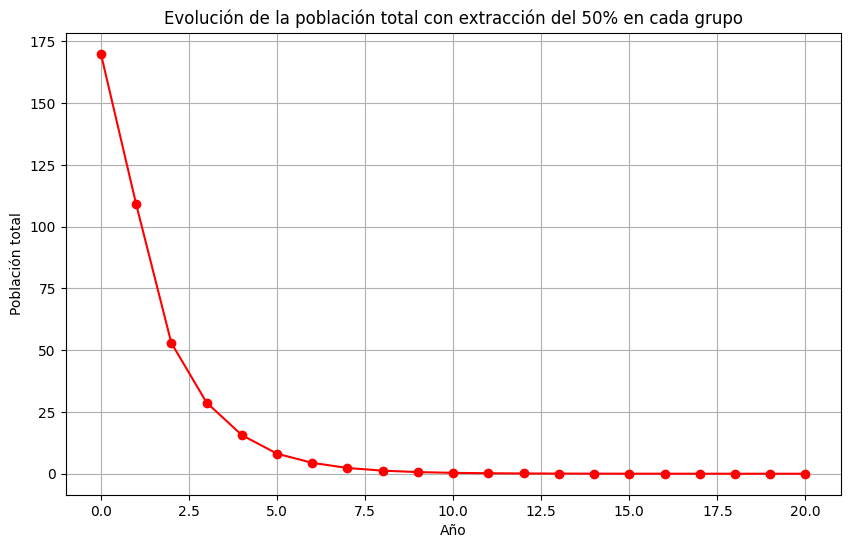

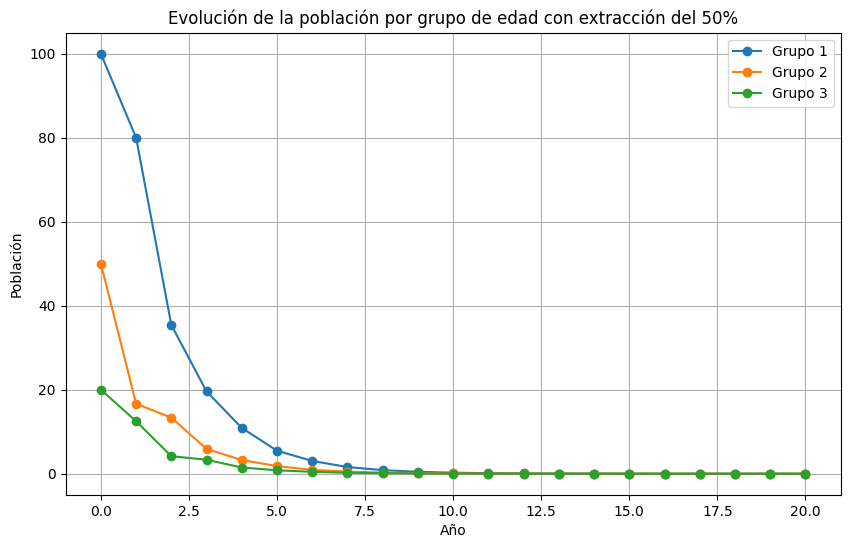

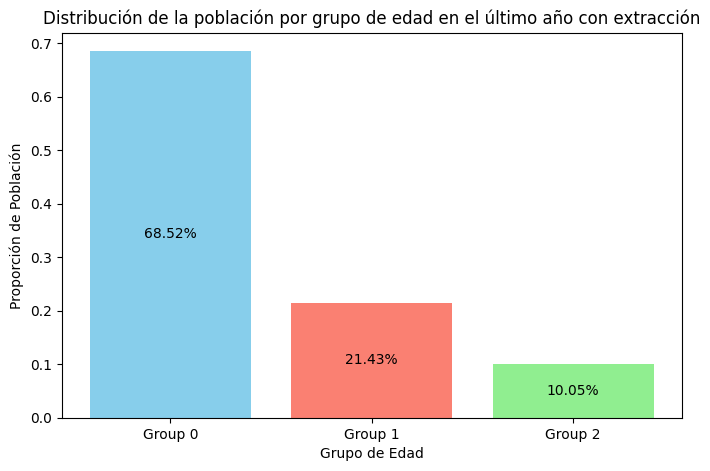

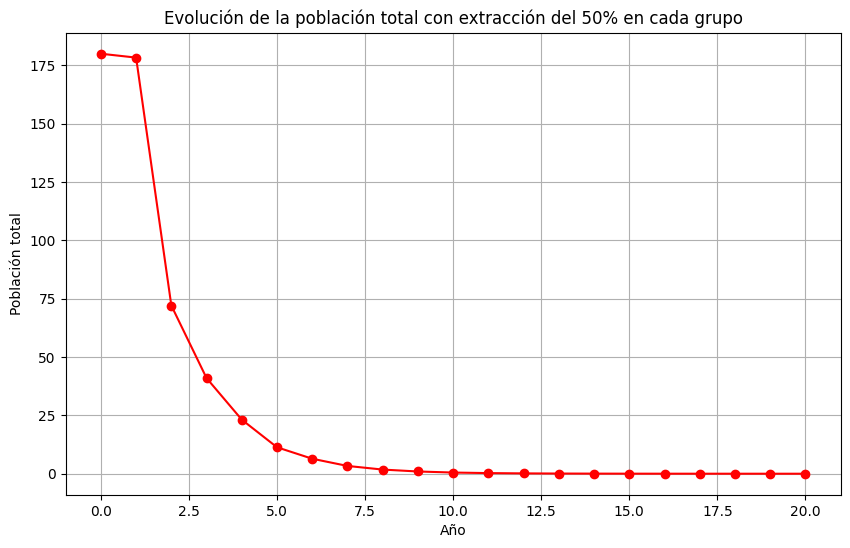

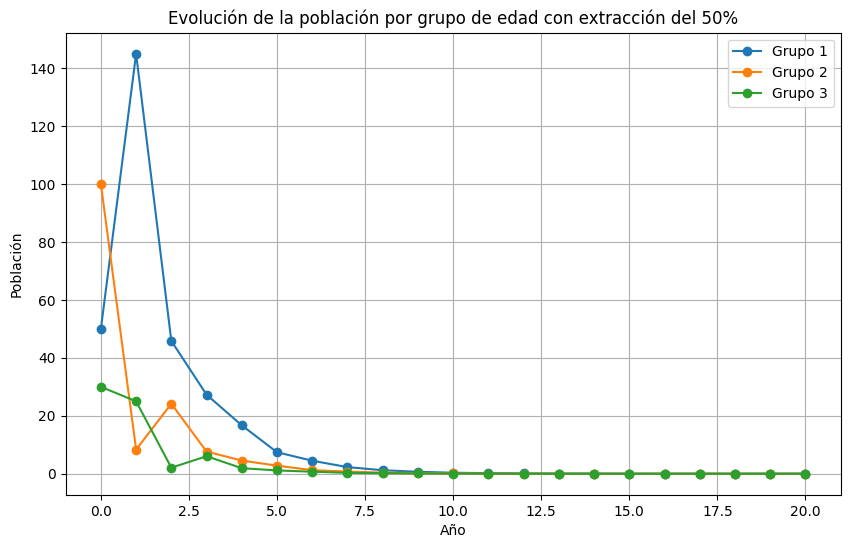

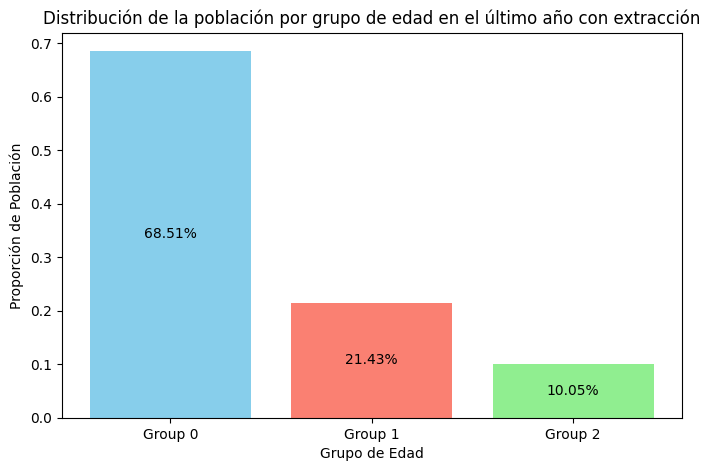

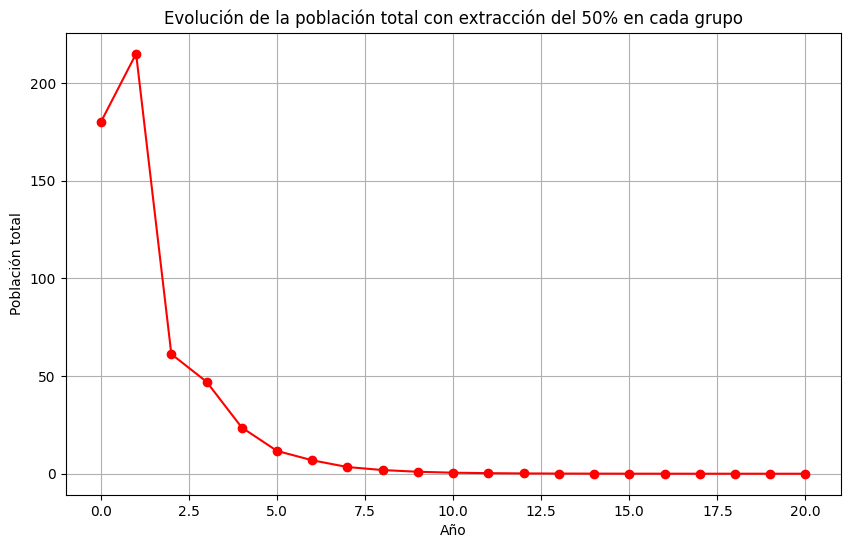

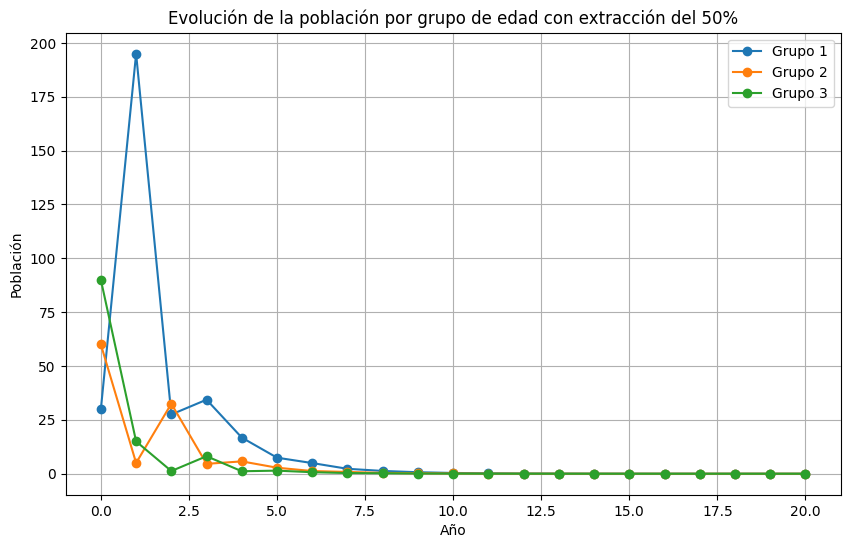

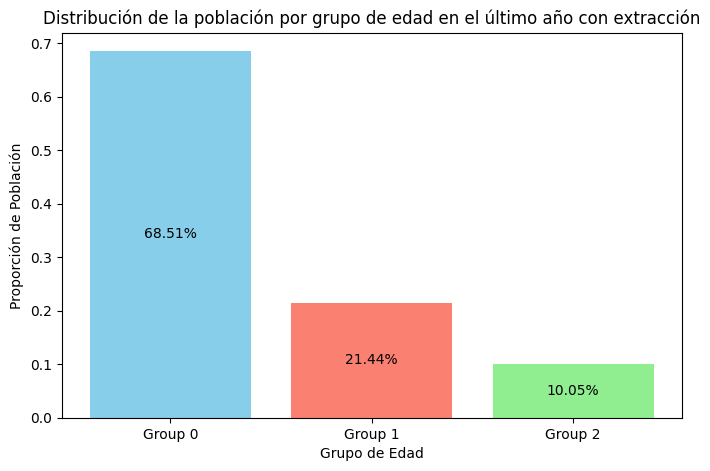

In [ ]:
# Tasa de extracción (50%)
d = 0.5
D = np.diag([1 - d, 1 - d, 1 - d])

# Matriz de Leslie ajustada
L_adjusted = D @ L

# Calcular los autovalores y autovectores de la matriz ajustada
vals_adjusted, vecs_adjusted = eig(L_adjusted)

# Obtener el autovalor dominante
idx_adjusted = np.argmax(np.abs(vals_adjusted))
lambda_dominante_adjusted = np.real(vals_adjusted[idx_adjusted])
autovector_dominante_adjusted = np.real(vecs_adjusted[:, idx_adjusted])

# Normalizar el autovector para obtener proporciones
proporciones_adjusted = autovector_dominante_adjusted / np.sum(autovector_dominante_adjusted)

# Mostrar resultados para el caso ajustado
print("\nCon extracción del 50% en cada grupo:")
print("Autovalor dominante (λ):", lambda_dominante_adjusted)
print("Tipo de crecimiento:", end=" ")
if lambda_dominante_adjusted > 1:
    print("Expansivo")
elif lambda_dominante_adjusted == 1:
    print("Estable")
else:
    print("En extinción")

print("Proporción a largo plazo en cada grupo:")
for i, p in enumerate(proporciones_adjusted, 1):
    print(f"Grupo {i}: {p*100:.2f}%")

# Reiniciar el vector de población inicial
n0_list = [ np.array([100, 50, 20]),
            np.array([50, 100, 30]),
            np.array([30, 60, 90])]

for n0 in n0_list:
    # Almacenar la población en cada año
    poblacion_cosecha = np.zeros((años + 1, 3))
    poblacion_cosecha[0, :] = n0

    # Simulación a lo largo del tiempo con cosecha
    for t in range(años):
        poblacion_cosecha[t + 1, :] = L_adjusted @ poblacion_cosecha[t, :]

    # Calcular la población total en cada año
    poblacion_total_cosecha = np.sum(poblacion_cosecha, axis=1)

    # Graficar la población total a lo largo del tiempo
    plt.figure(figsize=(10, 6))
    plt.plot(range(años + 1), poblacion_total_cosecha, marker='o', color='red')
    plt.title('Evolución de la población total con extracción del 50% en cada grupo')
    plt.xlabel('Año')
    plt.ylabel('Población total')
    plt.grid(True)
    plt.show()

    # Graficar la población por grupo de edad con extracción
    plt.figure(figsize=(10, 6))
    for i in range(3):
        plt.plot(range(años + 1), poblacion_cosecha[:, i], marker='o', label=f'Grupo {i+1}')
    plt.title('Evolución de la población por grupo de edad con extracción del 50%')
    plt.xlabel('Año')
    plt.ylabel('Población')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Graficar la distribución de población por grupo de edad en el último año
    plt.figure(figsize=(8, 5))
    plt.bar(grupos, poblacion_cosecha[-1, :] / poblacion_total_cosecha[-1], color=['skyblue', 'salmon', 'lightgreen'])
    for i, p in enumerate(poblacion_cosecha[-1, :] / poblacion_total_cosecha[-1]):
        plt.text(i, p / 2, f"{p * 100:.2f}%", ha='center', va='center', color='black')
    plt.title('Distribución de la población por grupo de edad en el último año con extracción')
    plt.xlabel('Grupo de Edad')
    plt.ylabel('Proporción de Población')
    plt.show()

**Apartado 2**. Se entiende por *extracción sostenible* aquella que mantiene la población estable a largo plazo.

(a) Encontrar numéricamente la extracción máxima sostenible si solo se permite extraer un porcentaje idéntico de los grupos de edad 2 y 3, esto es, $d_1=0$, $d_2=d_3$

Tasa máxima de extracción sostenible (d2 = d3 = d): 10.32%


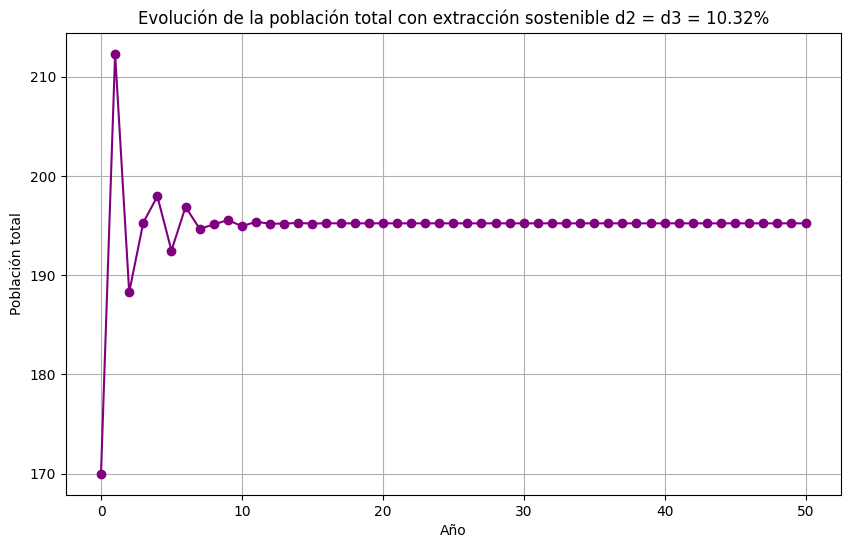

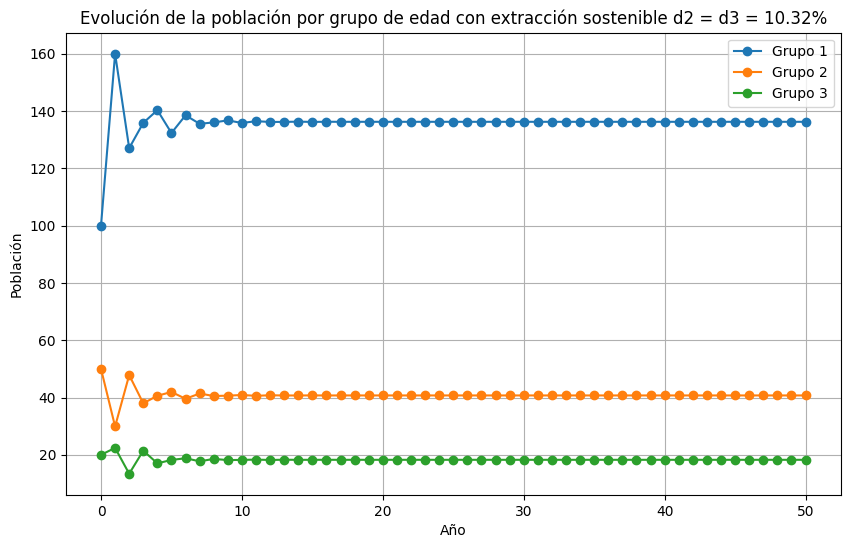

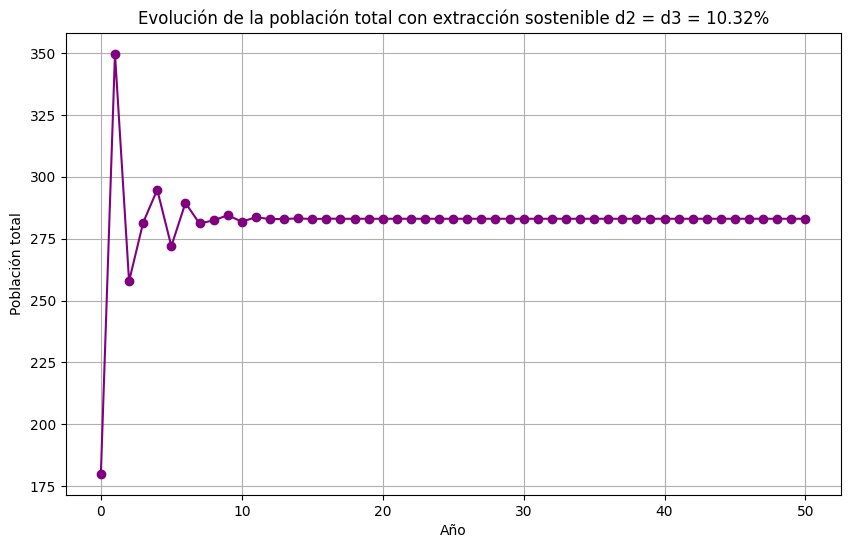

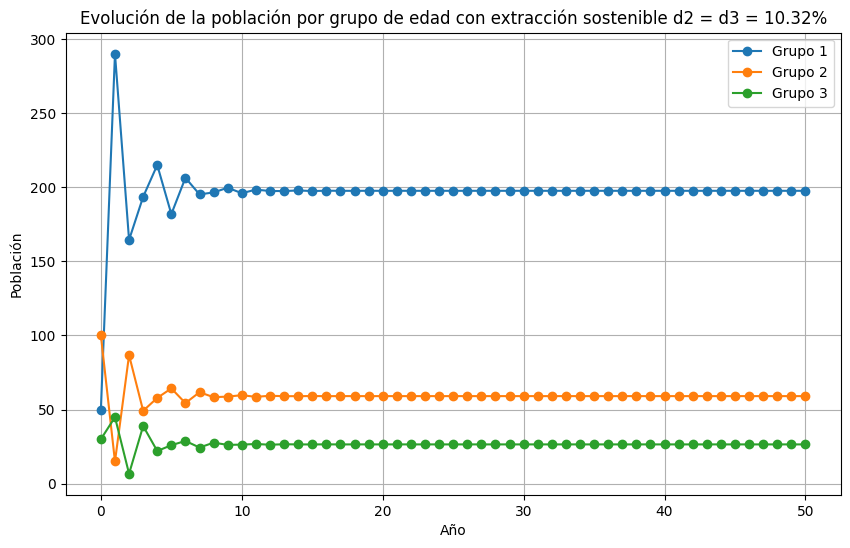

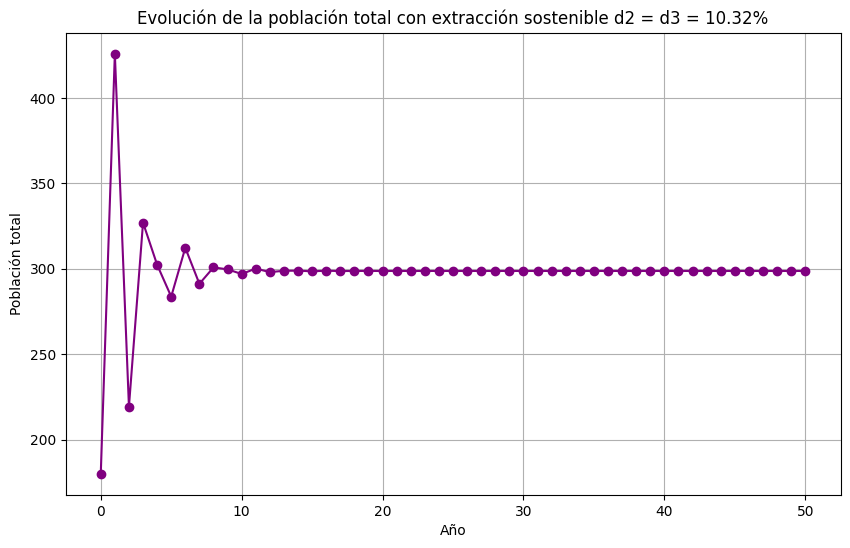

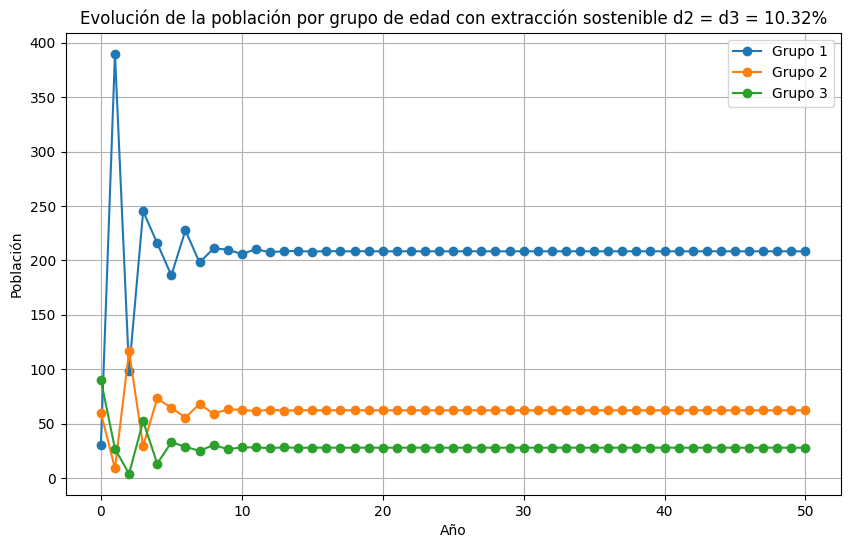

In [ ]:
import numpy as np
from scipy.linalg import eig
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

# Matriz de Leslie original
L = np.array([[0,     2,     3],
              [1/3,   0,     0],
              [0,     1/2,   0]])

# Función para calcular el autovalor dominante dado d
def lambda_dominante_a(d):
    d = np.asarray(d).item()
    D = np.diag([1, 1 - d, 1 - d])
    L_adjusted = D @ L
    vals, _ = eig(L_adjusted)
    lambda_dom = max(np.abs(vals))
    return lambda_dom

# Función objetivo para encontrar d tal que lambda_dominante - 1 = 0
def funcion_objetivo_a(d):
    return lambda_dominante_a(d) - 1

# Encontrar el valor de d utilizando fsolve
d_inicial = 0.05
d_max_sostenible_a = fsolve(funcion_objetivo_a, d_inicial)[0]
print(f"Tasa máxima de extracción sostenible (d2 = d3 = d): {d_max_sostenible_a*100:.2f}%")

# Configuración de la matriz de Leslie ajustada con la tasa de extracción sostenible
D = np.diag([1, 1 - d_max_sostenible_a, 1 - d_max_sostenible_a])
L_adjusted = D @ L

# Configuración de la simulación
años = 50  # número de años para simular
n0_list = [np.array([100, 50, 20]), np.array([50, 100, 30]), np.array([30, 60, 90])]
for n0 in n0_list:
    # Almacenar la población en cada año
    poblacion = np.zeros((años + 1, 3))
    poblacion[0, :] = n0

    # Simulación a lo largo del tiempo
    for t in range(años):
        poblacion[t + 1, :] = L_adjusted @ poblacion[t, :]

    # Calcular la población total en cada año
    poblacion_total = np.sum(poblacion, axis=1)

    # Graficar la evolución de la población total en el tiempo
    plt.figure(figsize=(10, 6))
    plt.plot(range(años + 1), poblacion_total, marker='o', color='purple')
    plt.title(f'Evolución de la población total con extracción sostenible d2 = d3 = {d_max_sostenible_a*100:.2f}%')
    plt.xlabel('Año')
    plt.ylabel('Población total')
    plt.grid(True)
    plt.show()

    # Graficar la evolución de la población por grupo de edad
    plt.figure(figsize=(10, 6))
    for i in range(3):
        plt.plot(range(años + 1), poblacion[:, i], marker='o', label=f'Grupo {i + 1}')
    plt.title(f'Evolución de la población por grupo de edad con extracción sostenible d2 = d3 = {d_max_sostenible_a*100:.2f}%')
    plt.xlabel('Año')
    plt.ylabel('Población')
    plt.legend()
    plt.grid(True)
    plt.show()

(b) Lo mismo cuando solo se permite extraer un porcentaje de la población 3, esto es, $d_1=d_2=0$;

Tasa máxima de extracción sostenible (d3 = d): 33.33%


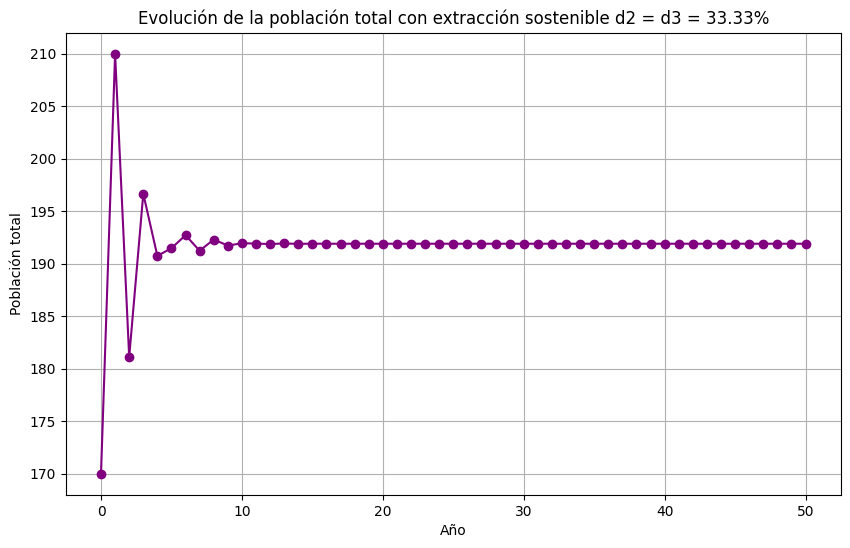

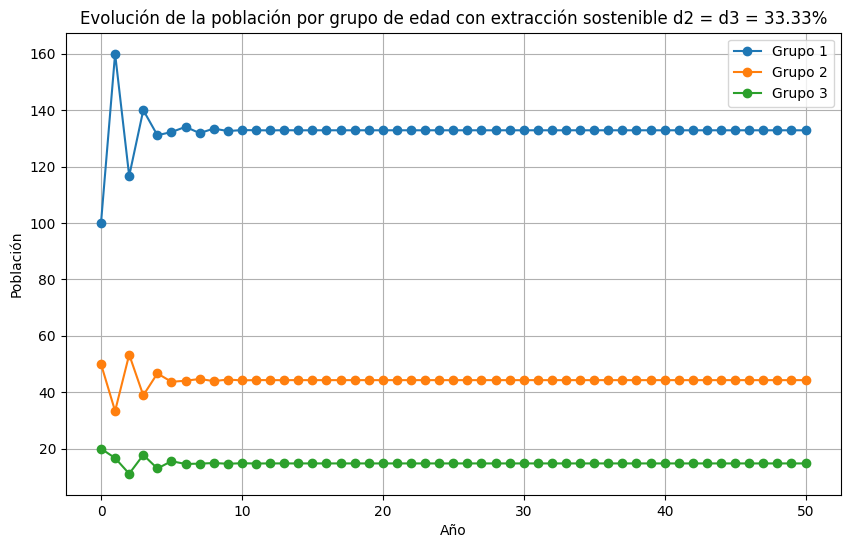

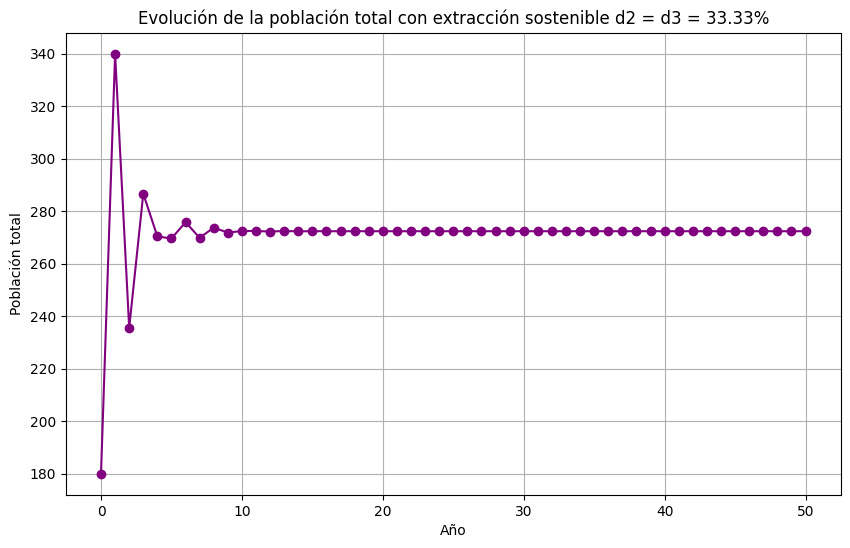

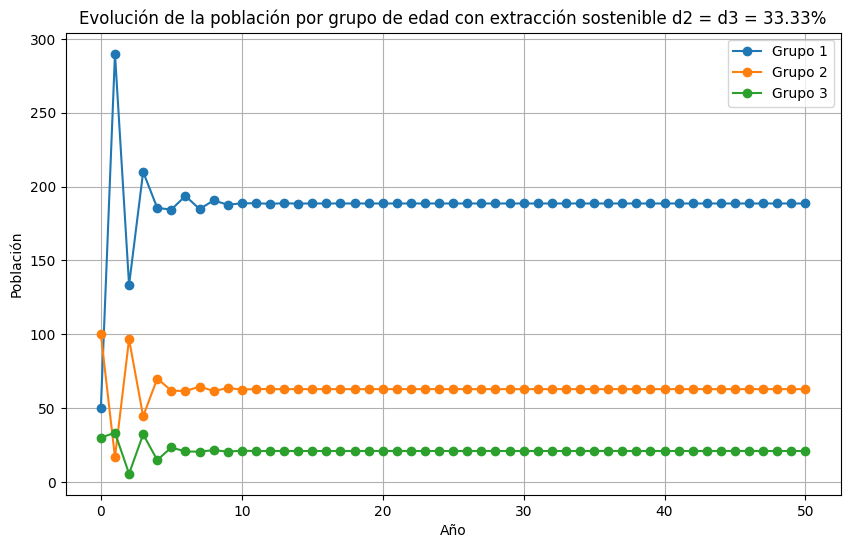

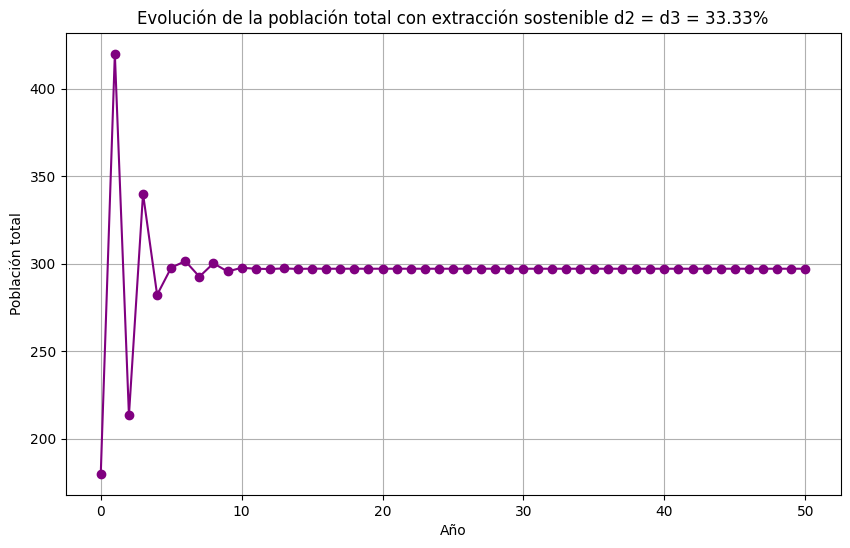

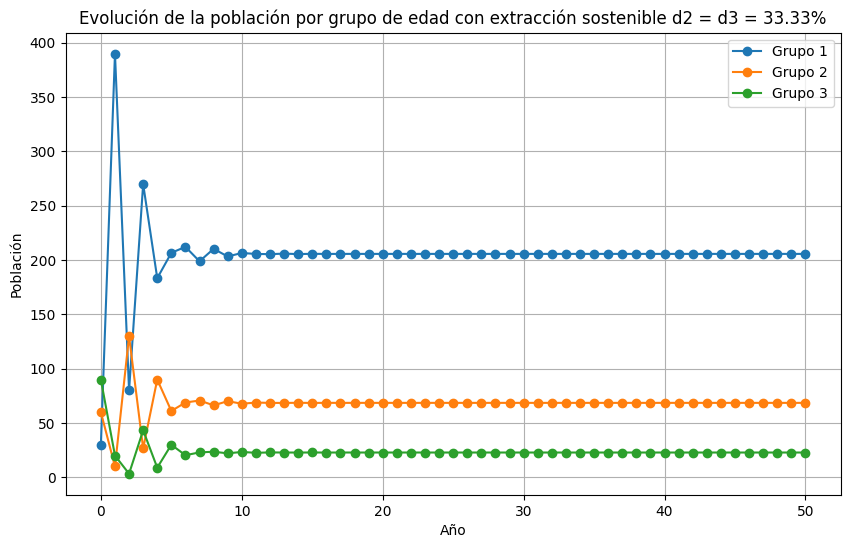

In [ ]:
# Función para calcular el autovalor dominante dado d
def lambda_dominante_b(d):
    # Tasa de supervivencia ajustada
    d = np.asarray(d).item()
    D = np.diag([1, 1, 1 - d])
    # Matriz de Leslie ajustada
    L_adjusted = D @ L
    # Calcular los autovalores
    vals, _ = eig(L_adjusted)
    # Obtener el autovalor dominante
    lambda_dom = max(np.abs(vals))
    return lambda_dom

# Función objetivo para encontrar d tal que lambda_dominante - 1 = 0
def funcion_objetivo_b(d):
    return lambda_dominante_b(d) - 1

# Encontrar el valor de d utilizando fsolve
d_inicial = 0.1  # Valor inicial para la iteración
d_max_sostenible_b = fsolve(funcion_objetivo_b, d_inicial)[0]

print(f"Tasa máxima de extracción sostenible (d3 = d): {d_max_sostenible_b*100:.2f}%")

# Configuración de la matriz de Leslie ajustada con la tasa de extracción sostenible
D = np.diag([1, 1, 1 - d_max_sostenible_b])
L_adjusted = D @ L

# Configuración de la simulación
años = 50  # número de años para simular
n0_list = [np.array([100, 50, 20]), np.array([50, 100, 30]), np.array([30, 60, 90])]
for n0 in n0_list:
    # Almacenar la población en cada año
    poblacion = np.zeros((años + 1, 3))
    poblacion[0, :] = n0

    # Simulación a lo largo del tiempo
    for t in range(años):
        poblacion[t + 1, :] = L_adjusted @ poblacion[t, :]

    # Calcular la población total en cada año
    poblacion_total = np.sum(poblacion, axis=1)

    # Graficar la evolución de la población total en el tiempo
    plt.figure(figsize=(10, 6))
    plt.plot(range(años + 1), poblacion_total, marker='o', color='purple')
    plt.title(f'Evolución de la población total con extracción sostenible d2 = d3 = {d_max_sostenible_b*100:.2f}%')
    plt.xlabel('Año')
    plt.ylabel('Población total')
    plt.grid(True)
    plt.show()

    # Graficar la evolución de la población por grupo de edad
    plt.figure(figsize=(10, 6))
    for i in range(3):
        plt.plot(range(años + 1), poblacion[:, i], marker='o', label=f'Grupo {i + 1}')
    plt.title(f'Evolución de la población por grupo de edad con extracción sostenible d2 = d3 = {d_max_sostenible_b*100:.2f}%')
    plt.xlabel('Año')
    plt.ylabel('Población')
    plt.legend()
    plt.grid(True)
    plt.show()

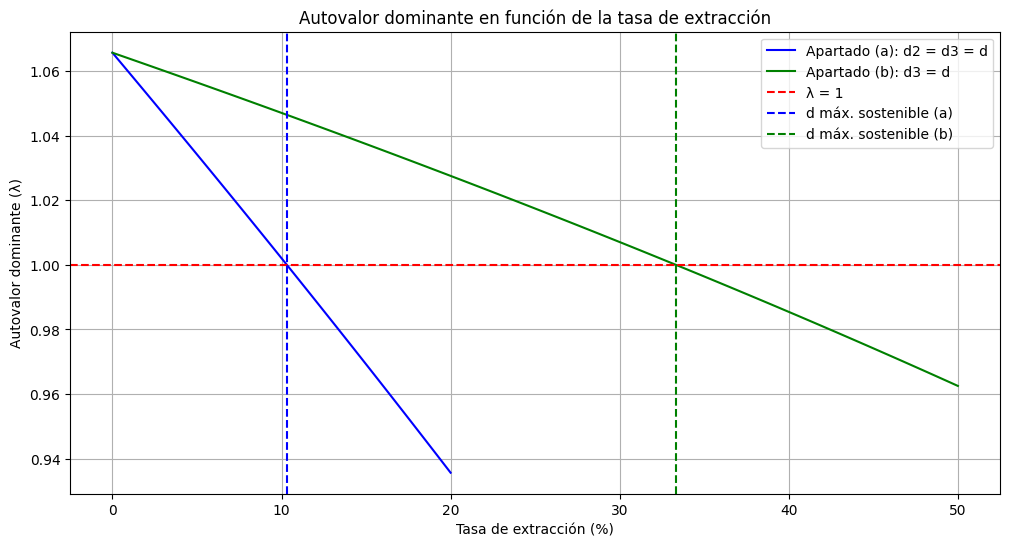

In [ ]:
import matplotlib.pyplot as plt

# Rango de valores de d para graficar
d_values_a = np.linspace(0, 0.2, 100)
d_values_b = np.linspace(0, 0.5, 100)

# Calcular lambda dominante para cada d en el apartado (a)
lambda_values_a = [lambda_dominante_a(d) for d in d_values_a]

# Calcular lambda dominante para cada d en el apartado (b)
lambda_values_b = [lambda_dominante_b(d) for d in d_values_b]

# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.plot(d_values_a*100, lambda_values_a, label='Apartado (a): d2 = d3 = d', color='blue')
plt.plot(d_values_b*100, lambda_values_b, label='Apartado (b): d3 = d', color='green')
plt.axhline(y=1, color='red', linestyle='--', label='λ = 1')
plt.axvline(x=d_max_sostenible_a*100, color='blue', linestyle='--', label='d máx. sostenible (a)')
plt.axvline(x=d_max_sostenible_b*100, color='green', linestyle='--', label='d máx. sostenible (b)')
plt.xlabel('Tasa de extracción (%)')
plt.ylabel('Autovalor dominante (λ)')
plt.title('Autovalor dominante en función de la tasa de extracción')
plt.legend()
plt.grid(True)
plt.show()

### Conclusiones Finales
- Apartado (a): La tasa máxima de extracción sostenible es 10.32% cuando se extrae el mismo porcentaje de los grupos de edad 2 y 3.
- Apartado (b): La tasa máxima de extracción sostenible es 33.33% cuando solo se extrae del grupo de edad 3.
- Interpretación: Es más sostenible extraer únicamente del grupo de edad 3, ya que permite una tasa de extracción más alta sin comprometer la estabilidad de la población.

(c) Encontrar esa tasa de extracción analíticamente.